In [2]:
from arc_prize.train import ARCModelState, ARCTrainParams
from arc_prize.vis import visualize_epochs
import modal
import torch
import petname
from arc_prize.model import ARCTransformerEncoderDecoderParams



In [ ]:
from arc_prize.data import ARCDatasetParams, ReARCDataset, make_re_arc_data_loaders

config = ARCDatasetParams(max_grid_size=30, max_train_grids=10, color_offset=1)
dataset = ReARCDataset("data/re_arc/ff805c23.json", config)
train_loader, val_loader = make_re_arc_data_loaders(["data/re_arc/ff805c23.json"], 10, config)
len(val_loader.dataset)


In [6]:
import modal
from arc_prize.train import ARCTrainParams
from arc_prize.model import ARCTransformerEncoderDecoderParams
import petname

model_type = "vision_encoder"


model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=20,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=24,
  num_decoder_layers=0,
  num_heads=16,
  d_model=768,
  d_ff=768*4,
  dropout=0.1
)

train_params = ARCTrainParams(
  batch_size=30,
  learning_rate=5e-5,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/html_dim_20_20241103", "/vol/data/re_arc_dim_20", "/vol/data/barc_1_dim_20", "/vol/data/barc_2_dim_20"],
  loss_class_weights={0: 0.2},
  train_steps_per_epoch=4000,
  eval_steps_per_epoch=600,
  warmup_epochs=10,
  refinement_ratio=0.3
)

num_epochs = 200

model_names = []

num_runs = 1

fn = modal.Function.lookup("arc-prize", "train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_type, model_params, train_params)
  print("Model name", model_name, model_type, fn_call.object_id)
  model_names.append(model_name)

print(model_names)




Model name solely_famous_louse vision_encoder fc-01JC2DVQM1CAQMSQSM3SD9AVKG
['solely_famous_louse']


In [ ]:


from arc_prize.train import ARCTrainParams, train_on_mac
import petname
from arc_prize.model import ARCTransformerEncoderDecoderParams


model_type = "vision_encoder"
model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=12,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=2,
  num_decoder_layers=0,
  num_heads=2,
  d_model=16,
  d_ff=16*2,
  dropout=0.1
)

train_params = ARCTrainParams(
  batch_size=12,
  learning_rate=1e-4,
  weight_decay=1e-4,
  dataset_dir=["/Users/pfh/work/arc-data/flip"],
  train_steps_per_epoch=10,
  eval_steps_per_epoch=2,
)

num_epochs = 5

model_name = petname.generate(words=3, separator='_')  
print(model_name)
train_on_mac(model_name, num_epochs, model_type, model_params, train_params)





In [ ]:
model_type = "vision"
model_params = ARCTransformerEncoderDecoderParams(
  grid_dim=12,
  num_train_pairs=4,
  num_colors=10,
  num_encoder_layers=1,
  num_decoder_layers=1,
  num_heads=4,
  d_model=32,
  d_ff=32*4,
  dropout=0.2
)

train_params = ARCTrainParams(
  batch_size=32,
  learning_rate=1e-4,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/move_random_small", "/vol/data/flip"],
  loss_class_weights={0: 0.2},
  meta_num_epochs=2,
  meta_batch_size=10,
  meta_learning_rate=1e-4,
  meta_weight_decay=1e-4,
)

num_epochs = 30

model_names = []

num_runs = 1

fn = modal.Function.lookup("arc-prize-meta", "meta_train")
for i in range(num_runs):
  model_name = petname.generate(words=3, separator='_')
  fn_call = fn.spawn(model_name, num_epochs, model_type, model_params, train_params)
  print("Model name", model_name, model_type, fn_call.object_id)
  model_names.append(model_name)

print(model_names)

In [5]:
import modal
from arc_prize.train import ARCTrainParams

num_epochs = 100

# model_names = ['subtly_moral_bee', 'newly_mint_kite']
model_names = ["vastly_intent_frog"]
model_type = "vision_encoder"

train_params = ARCTrainParams(
  batch_size=20,
  learning_rate=1e-5,
  weight_decay=1e-4,
  dataset_dir=["/vol/data/html_dim_20_20241103", "/vol/data/re_arc_dim_20", "/vol/data/barc_1_dim_20", "/vol/data/barc_2_dim_20"],
  loss_class_weights={0: 0.2},
  train_steps_per_epoch=4000,
  eval_steps_per_epoch=600,
  warmup_epochs=10,
  refinement_ratio=0.3
)
# train_params = None

fn = modal.Function.lookup("arc-prize", "train")
for model_name in model_names:
  fn_call = fn.spawn(model_name, num_epochs, model_type, None, train_params)
  print("Model name", model_name, fn_call.object_id)
  


Model name vastly_intent_frog fc-01JC24V3ZSAAW71N8EKFWQ4QJT


kindly_living_spider 53 EpochState(train_loss=0.03380343530536114, train_accuracy=0.9925755289570675, val_loss=0.03945957914644877, val_accuracy=0.9929908569556666, lr=0.0001, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=0.8213285569532929, param_norm=586.5393706060162, start_time=1729950981.388339, end_time=1729954200.7808583) ARCTransformerEncoderDecoderParams(grid_dim=12, num_train_pairs=4, num_colors=10, num_encoder_layers=12, num_decoder_layers=0, num_heads=16, d_model=512, d_ff=2048, dropout=0.2)
unduly_worthy_zebra 135 EpochState(train_loss=0.023274855688214302, train_accuracy=0.9949548244476318, val_loss=0.04146460071206093, val_accuracy=0.9925390481948853, lr=6.25e-06, weight_decay=0.0001, beta1=0.9, beta2=0.999, epsilon=1e-08, grad_norm=0.15152900217622597, param_norm=750.1926260328318, start_time=1730688746.2969983, end_time=1730689270.2662613) ARCTransformerEncoderDecoderParams(grid_dim=20, num_train_pairs=4, num_colors=10, num_encoder_layers=12, nu

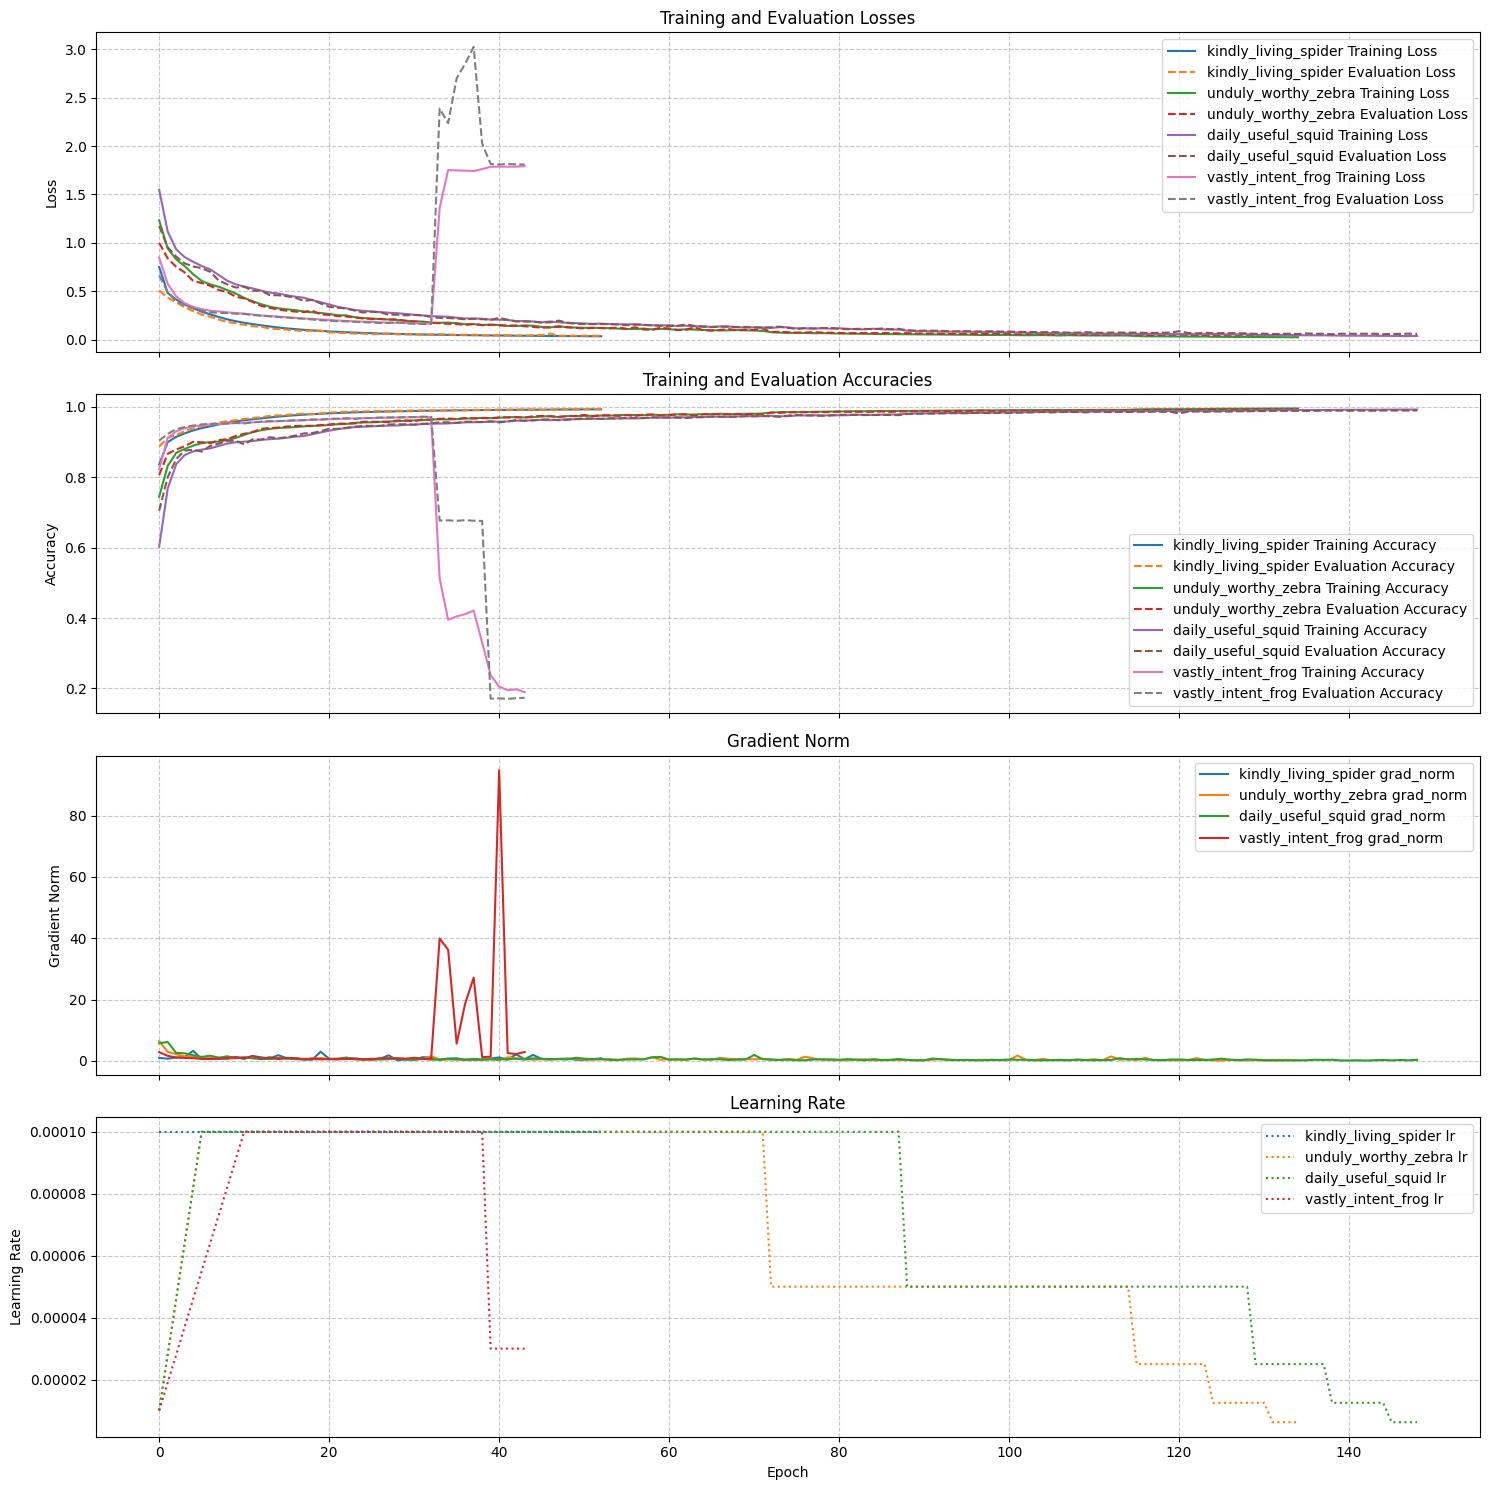

In [3]:
from arc_prize.train import ARCModelState, EpochState
from arc_prize.vis import visualize_epochs

def visualize_group(model_names: list[str]):
  epochs = {}
  get_model = modal.Function.lookup("arc-prize", "get_model")
  for name in model_names:
    checkpoint_dict = get_model.remote(name)
    # checkpoint = ARCModelState(**get_model.remote(name))
    print(name, len(checkpoint_dict["epochs"]), checkpoint_dict["epochs"][-1], checkpoint_dict["model_params"])
    epochs[name] = checkpoint_dict["epochs"]


    # print(len(checkpoint.encoder_attn_weights))
    # for b, batch in enumerate(checkpoint.encoder_attn_weights):
    #   for i, layer in enumerate(batch):
    #     visualize_all_heads(layer, title=f"Batch {b}, layer {i}")
    

  visualize_epochs(epochs)

  


groups = [
  # ['kindly_huge_jennet', 'lovely_tidy_lab', 'solely_living_leech'], # BEST
  # ['weekly_enough_moose', 'gently_known_beagle', 'nicely_robust_rhino'], # 20x20 too slow
  # ['wildly_firm_husky', 'surely_brief_bug', 'fully_better_dodo'], # Amazing
  # ['wildly_steady_iguana', 'yearly_smart_donkey', 'mainly_polite_bison'], # Includes scale dataset
  # ['partly_vocal_piglet', 'neatly_needed_liger', 'firmly_game_weevil'], # Scale and diagonal
  # ['wholly_tops_heron', 'solely_eager_foal', 'deeply_one_skink'], # Tons of data
  # ['unduly_glad_swift', 'purely_steady_hornet', 'humbly_civil_donkey'], # Basic data
  # ["early_civil_beetle"],
  # ["really_fancy_kitten", "mildly_humble_tahr"],
  # ['solely_brief_shad', 'fairly_amazed_hyena', 'vastly_amazed_bobcat'],
  # ['barely_sound_viper', 'lively_key_goblin', 'wildly_fancy_glider'], # patch size 3
  # ['mildly_able_horse', 'vastly_normal_rhino', 'oddly_mint_clam'], # patch size 2
  # ['firmly_tops_adder', 'yearly_normal_puma', 'slowly_more_caiman'], # patch size 2, simpler embedding
  # ['safely_poetic_adder', 'vastly_close_horse', 'fairly_legal_insect', 'daily_actual_monkey'], # Patch embedding with ARC pos encoding
  # ['nicely_wired_mouse', 'freely_up_shrimp', 'hardly_loving_mullet', 'gladly_active_muskox']
  # ['mostly_normal_dog', 'lively_pure_hawk', 'rarely_tender_roughy'], # HUGE dataset re_arc_dim_12
  # ['daily_pro_cattle', 'newly_suited_finch', 'rarely_tender_roughy'], # 32 batch size, 64 dim
  # ['solely_sound_sponge', 'lively_sacred_egret'], # 32 batch size, 128 dim, 3+3 layers
  # ['nicely_pure_leech', 'namely_sure_emu'], # 128 dim, 4+4 layers
  # ['subtly_moral_bee', 'newly_mint_kite', 'solely_busy_skunk'], # Vision transformer large models
  # ['newly_mint_kite', 'namely_caring_mite', 'overly_enough_tomcat', 'subtly_known_panda', 'mildly_ruling_hog', 'simply_tight_fowl'],
  # ['subtly_known_panda', 'barely_clean_cicada', 'sadly_real_viper'], # 512 dim (12x12, 20x20, 30x30)
  # ['lively_fleet_goat'], # vision 20x20
  # ["kindly_living_spider", "gladly_prompt_koi"] # encoder vs normal
  # ["kindly_living_spider", "unduly_worthy_zebra", "daily_useful_squid", "vastly_intent_frog"],
  ["vastly_intent_frog", "solely_famous_louse"],
]

# print([group for sublist in groups for group in sublist])
for group in groups:
  visualize_group(group)

In [49]:
import modal


eval_model = modal.Function.lookup("arc-prize", "evaluate_model")
output = eval_model.remote("vastly_intent_frog", ["/vol/data/eval_dim_20"], False, [0.8, 0.8], 30)
# output = eval_model.remote("daily_useful_squid", ["/vol/data/re_arc_dim_12_small"], False, [0.8, 0.2], 100)
# output = eval_model.remote("overly_hip_egret", ["/vol/data/re_arc/00d62c1b.json"], True, 1)


In [7]:
import modal
fn = modal.Function.lookup("arc-prize", "finetune_and_predict")
output = fn.remote("daily_useful_squid", ["/vol/data/eval_dim_20"], 12, 20)

In [50]:
import numpy as np

correct = 0
total = 0
accuracy = 0.0
for item in output:
    if np.array_equal(item["output_grid"], item["refined_predictions"].squeeze(0)) is True:
        correct += 1
    accuracy += (item["refined_predictions"].squeeze(0) == item["output_grid"]).astype(float).mean()
    total += 1
accuracy /= total

print(correct, total, correct / total, accuracy)

0 31 0.0 0.9035483870967742


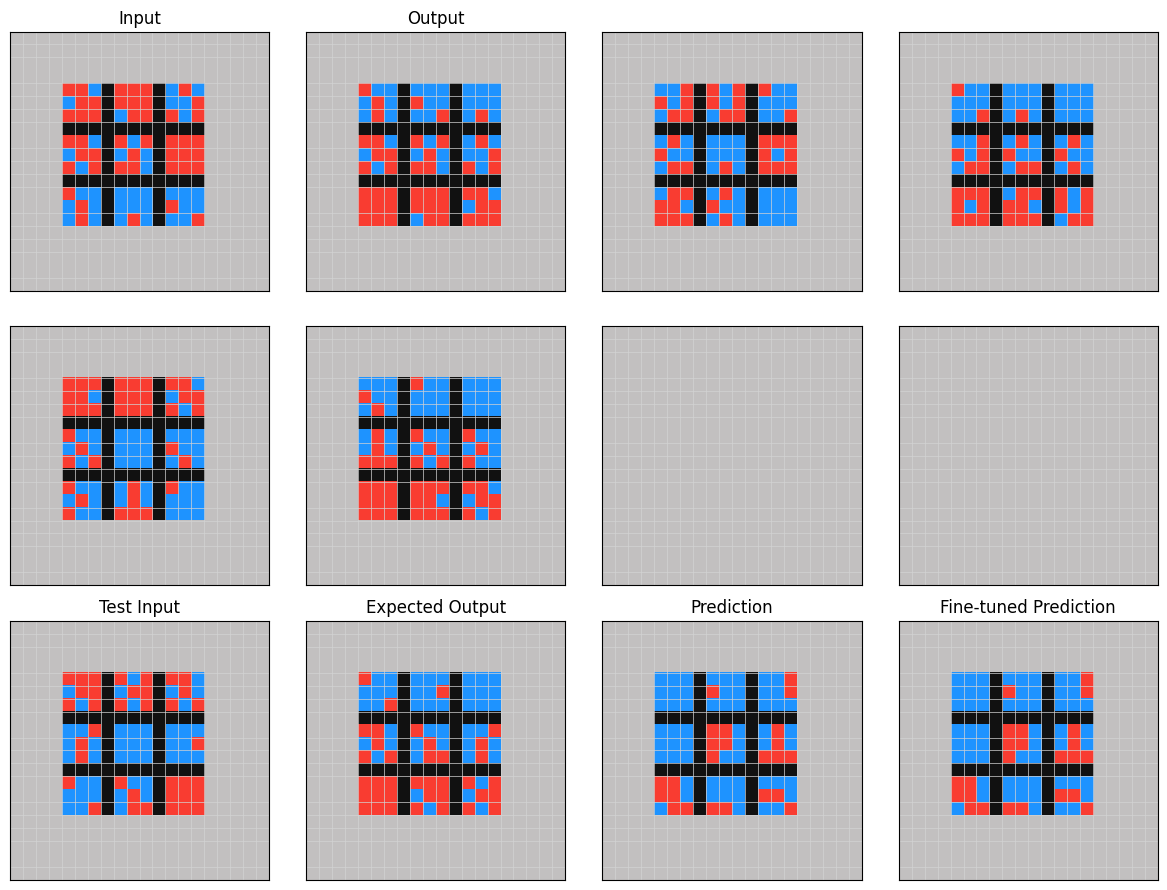

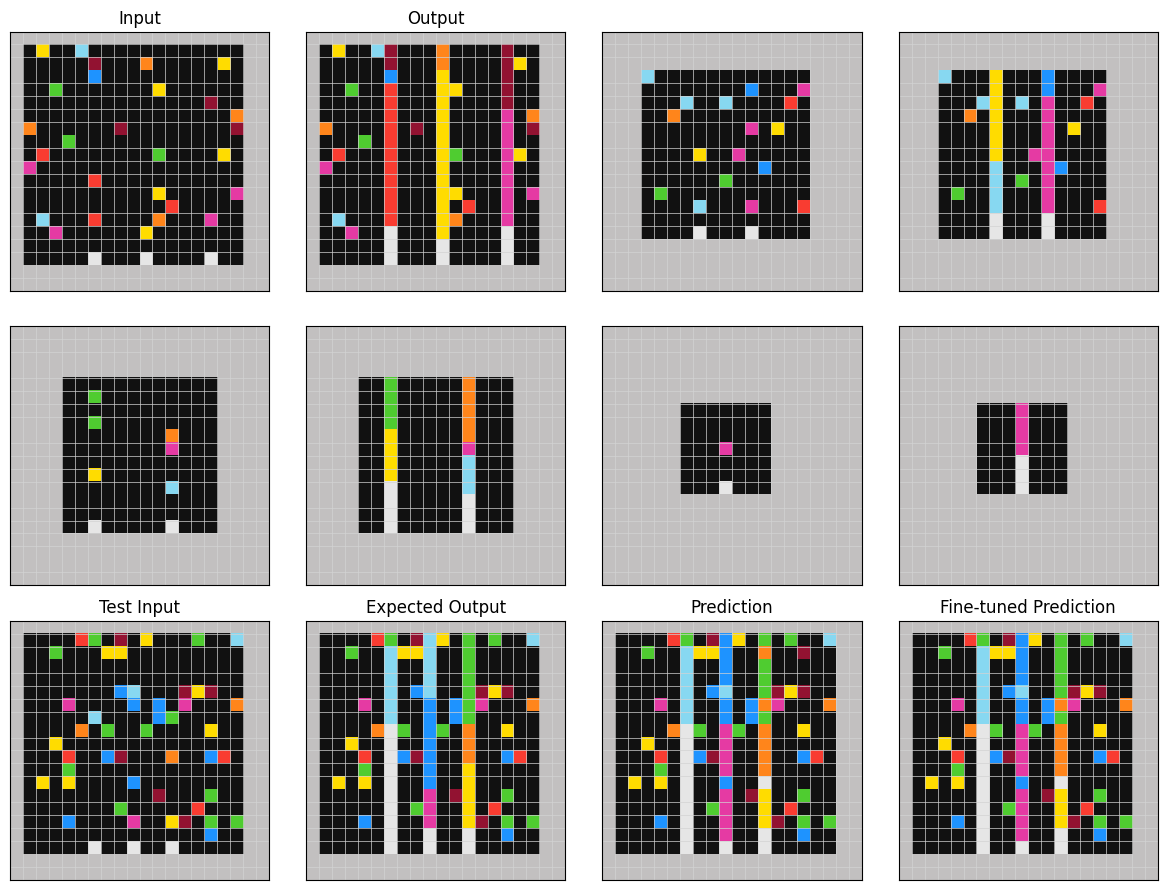

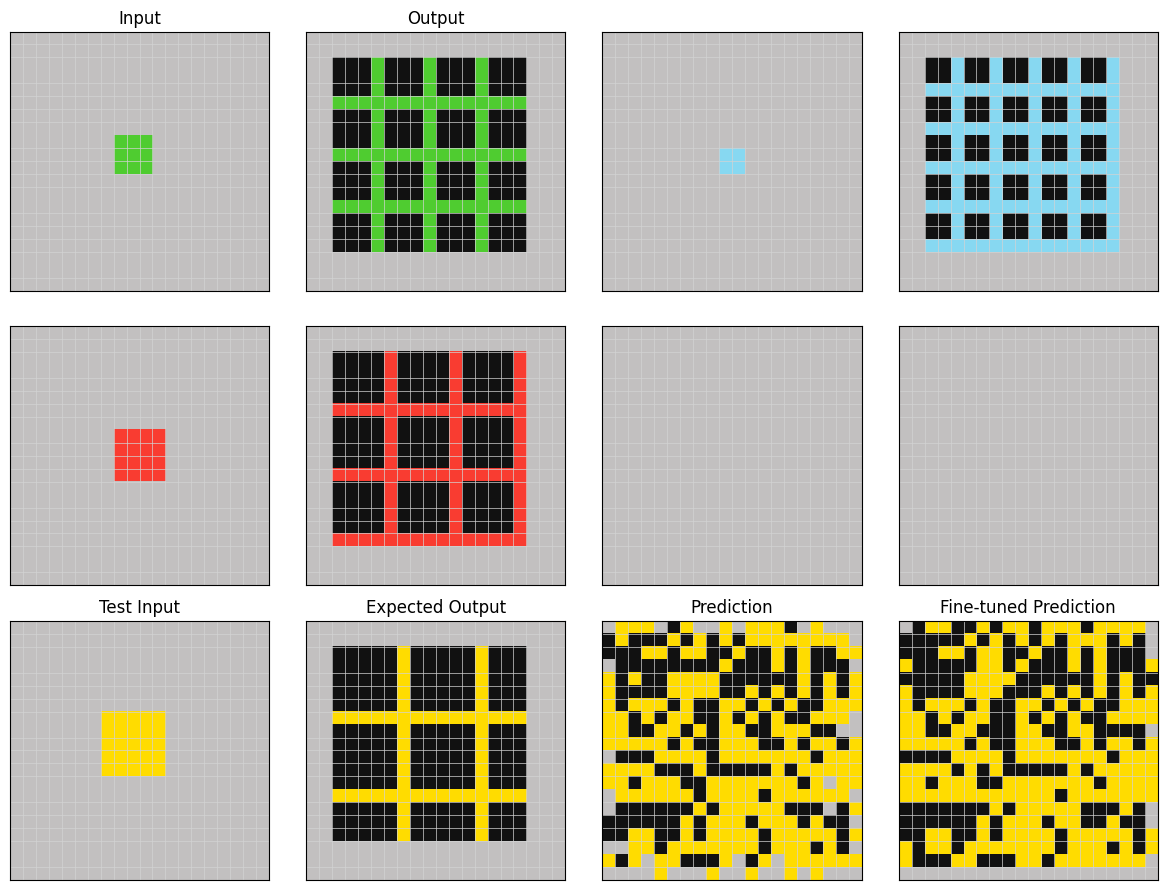

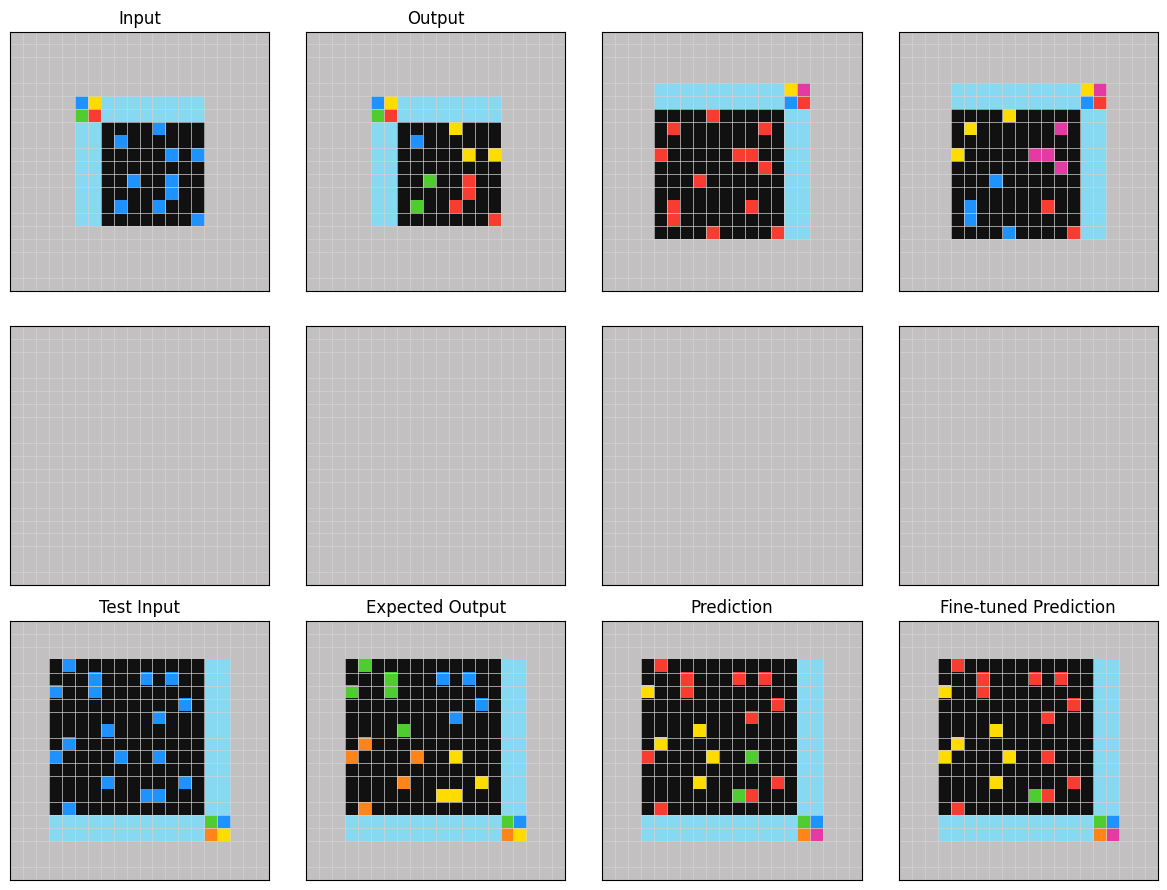

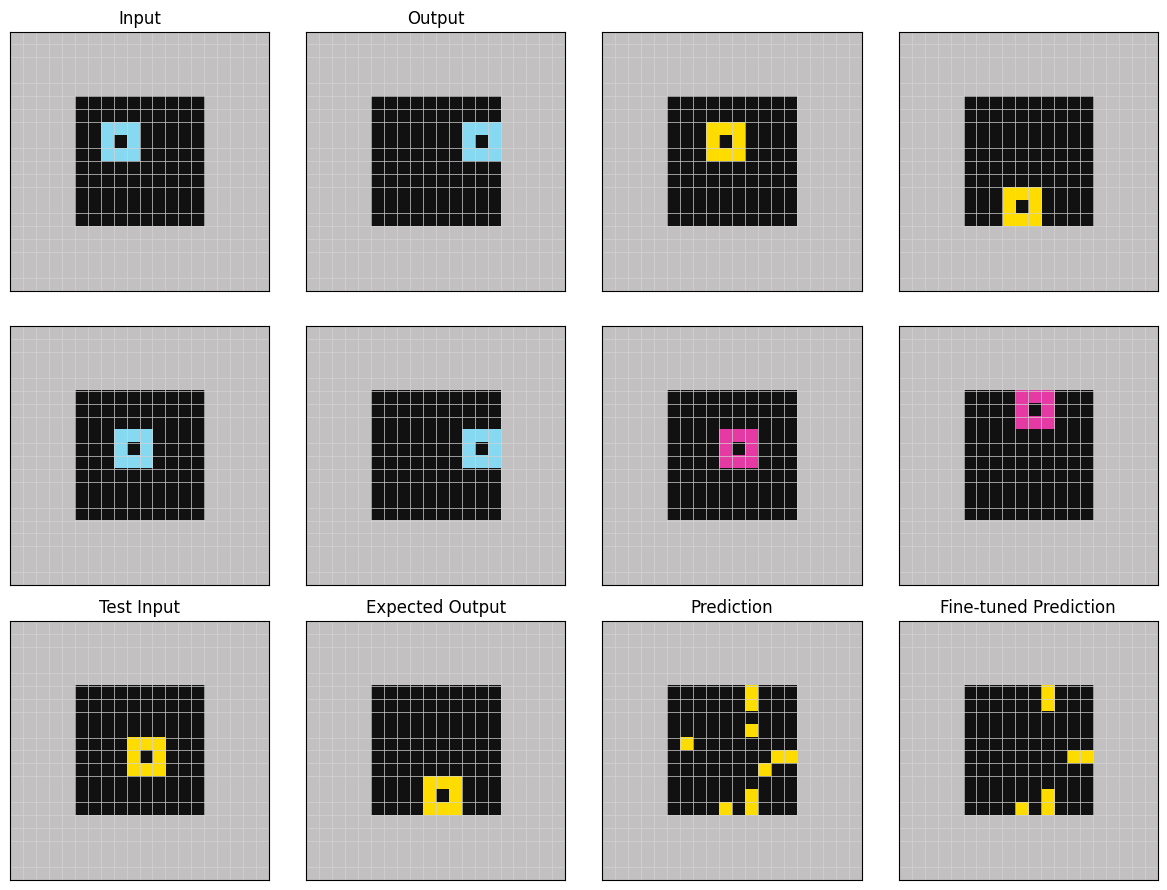

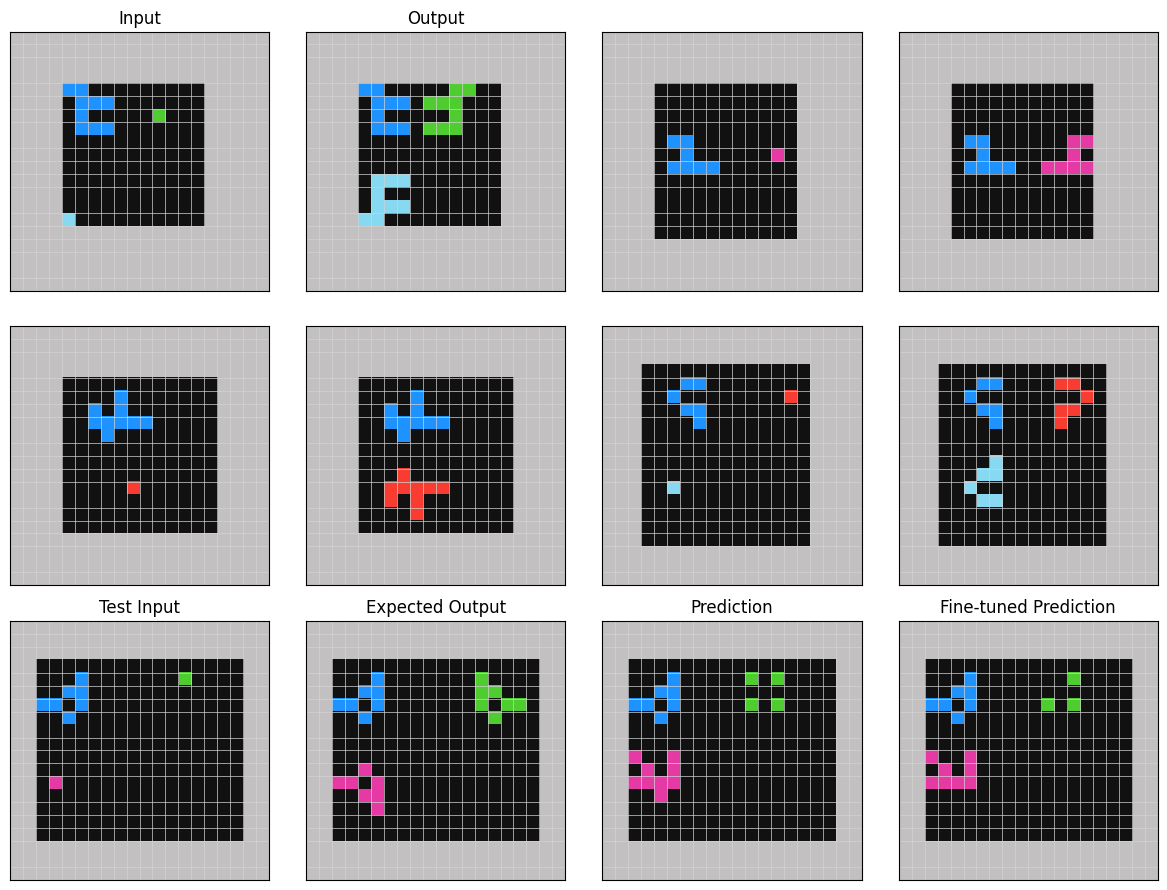

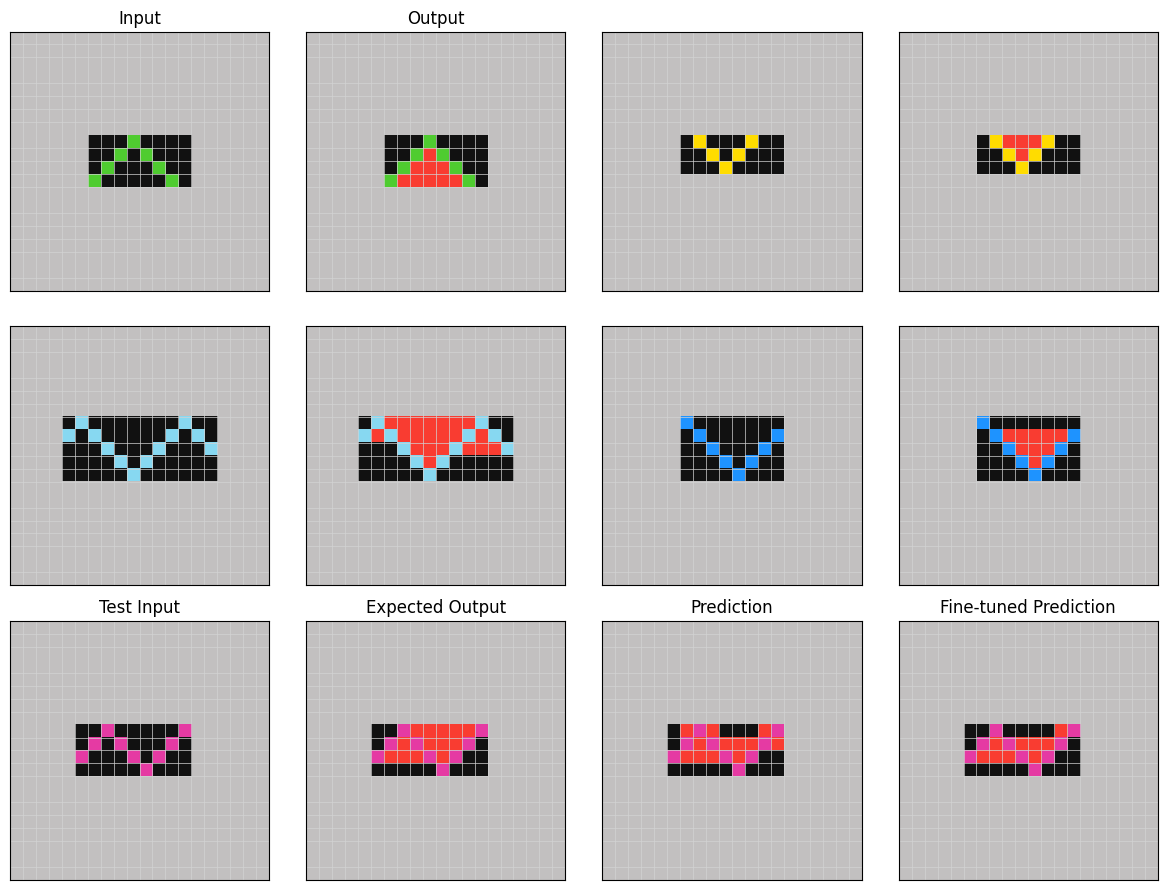

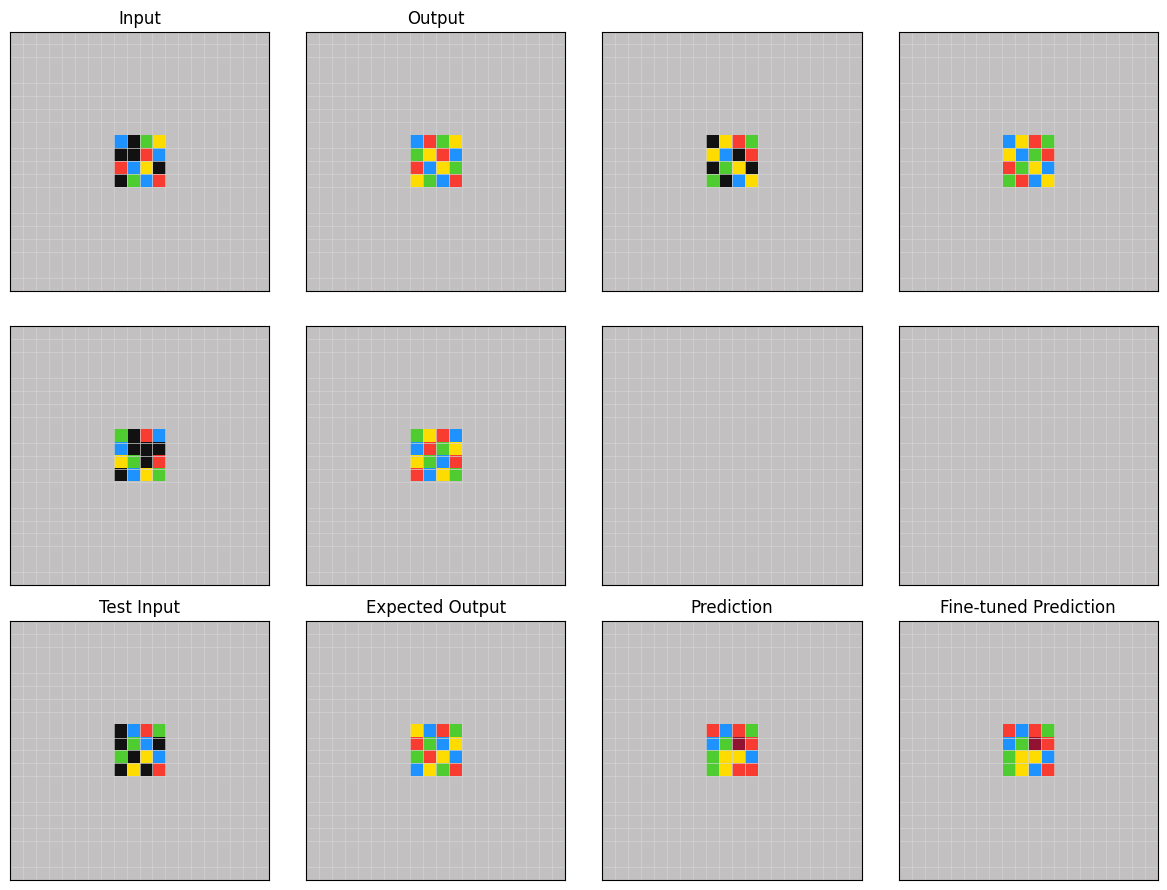

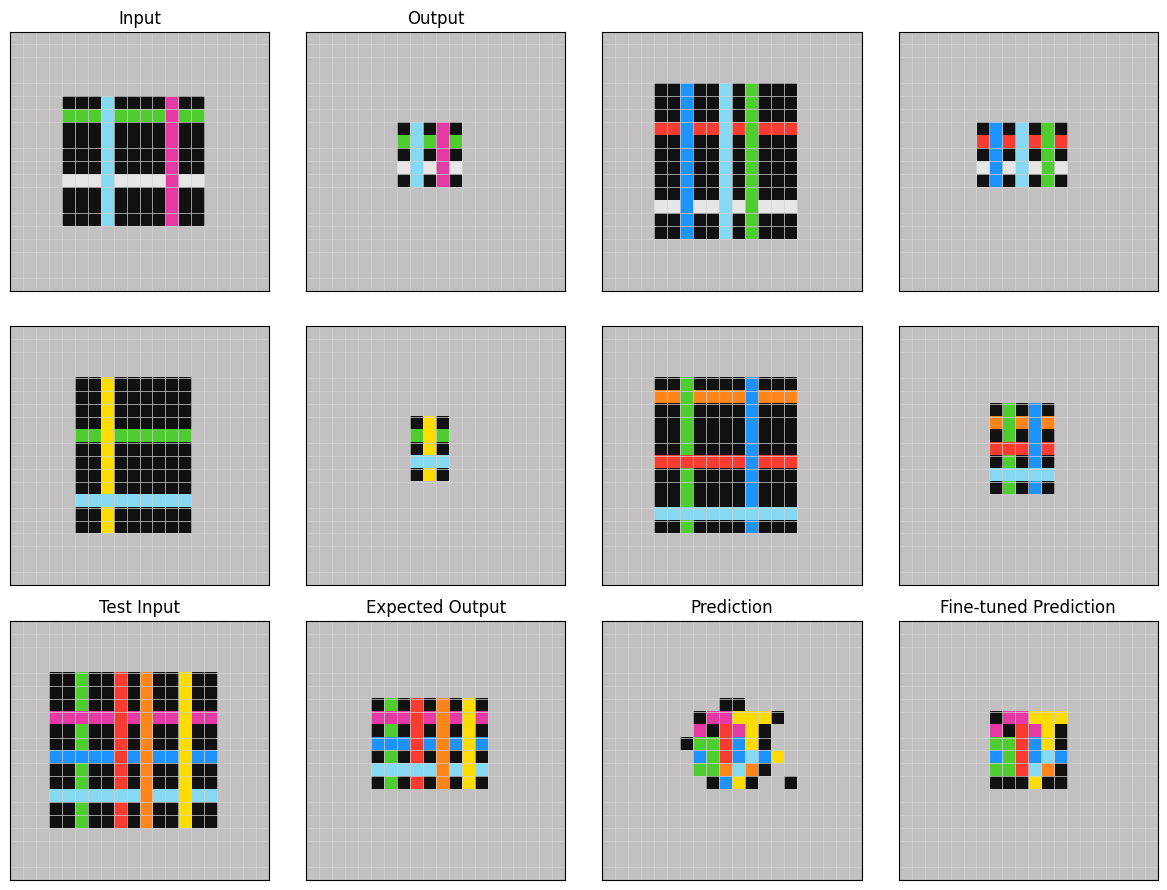

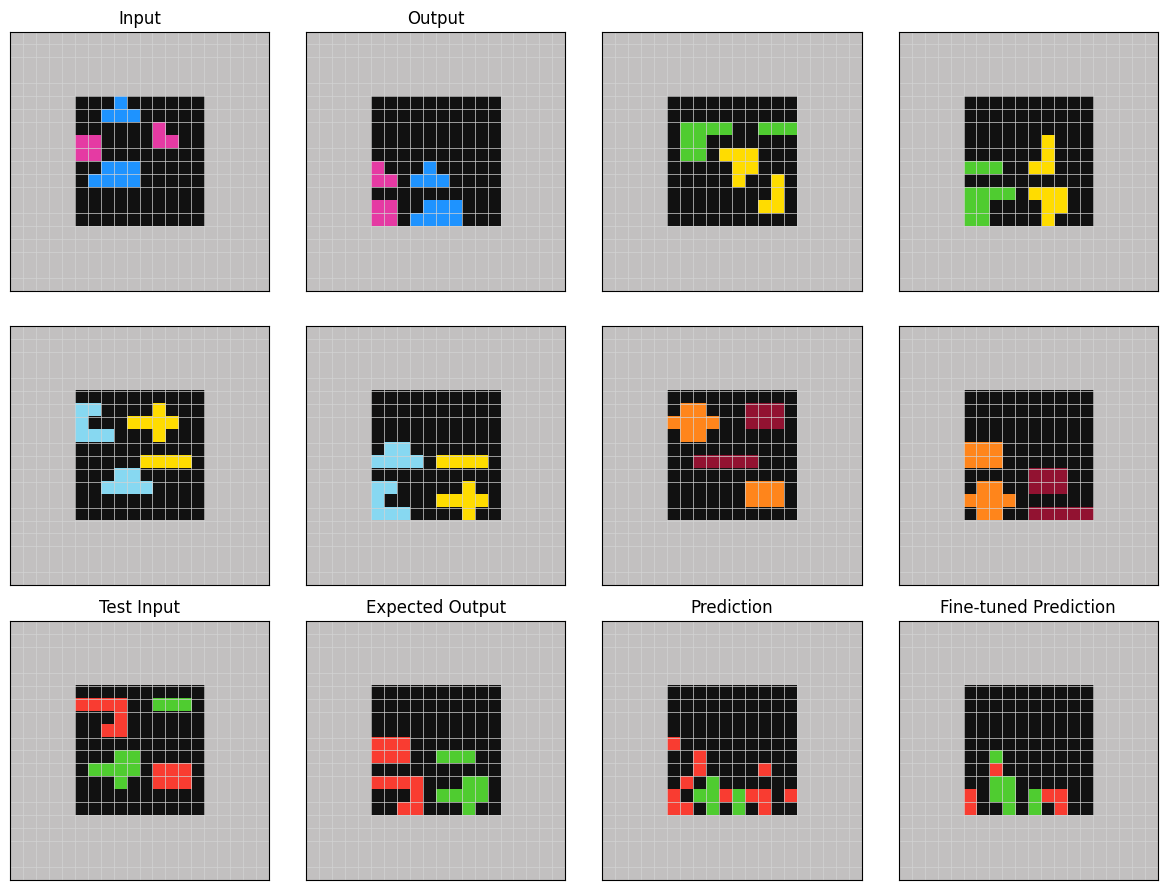

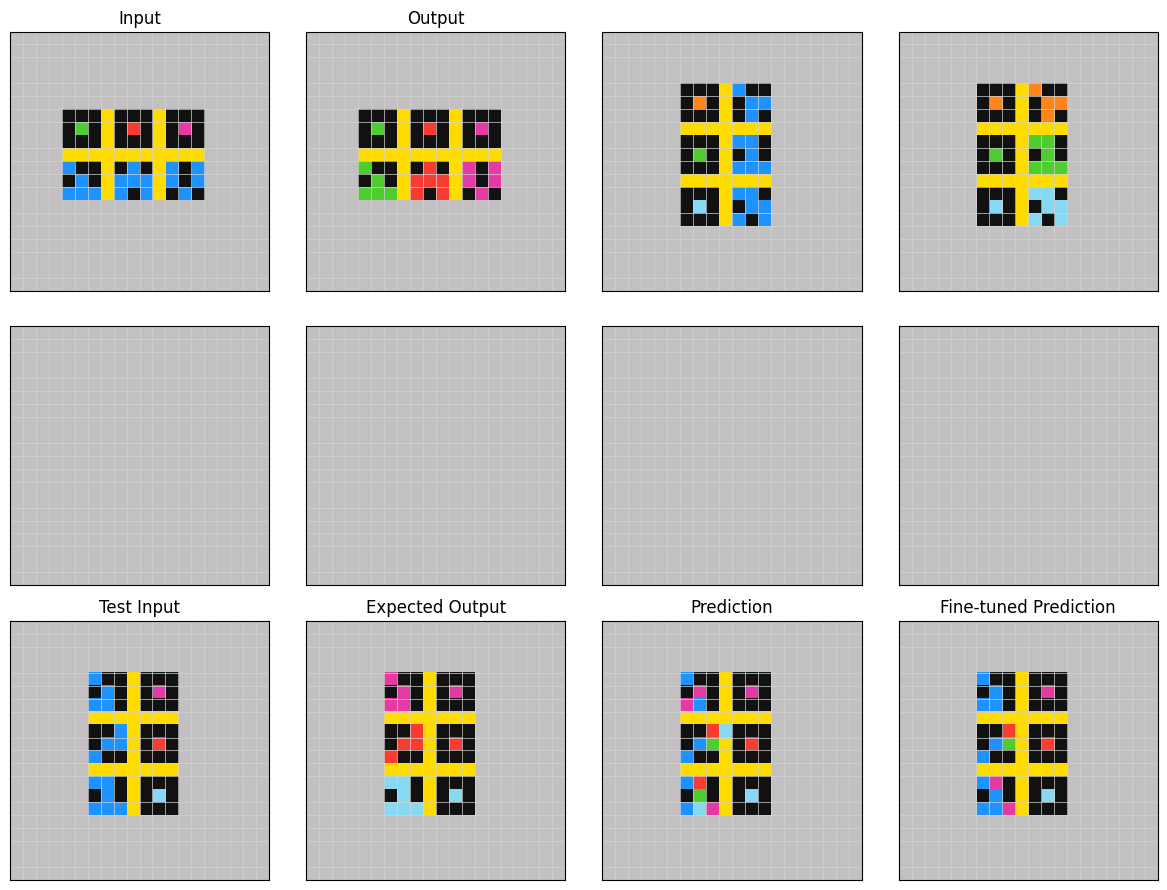

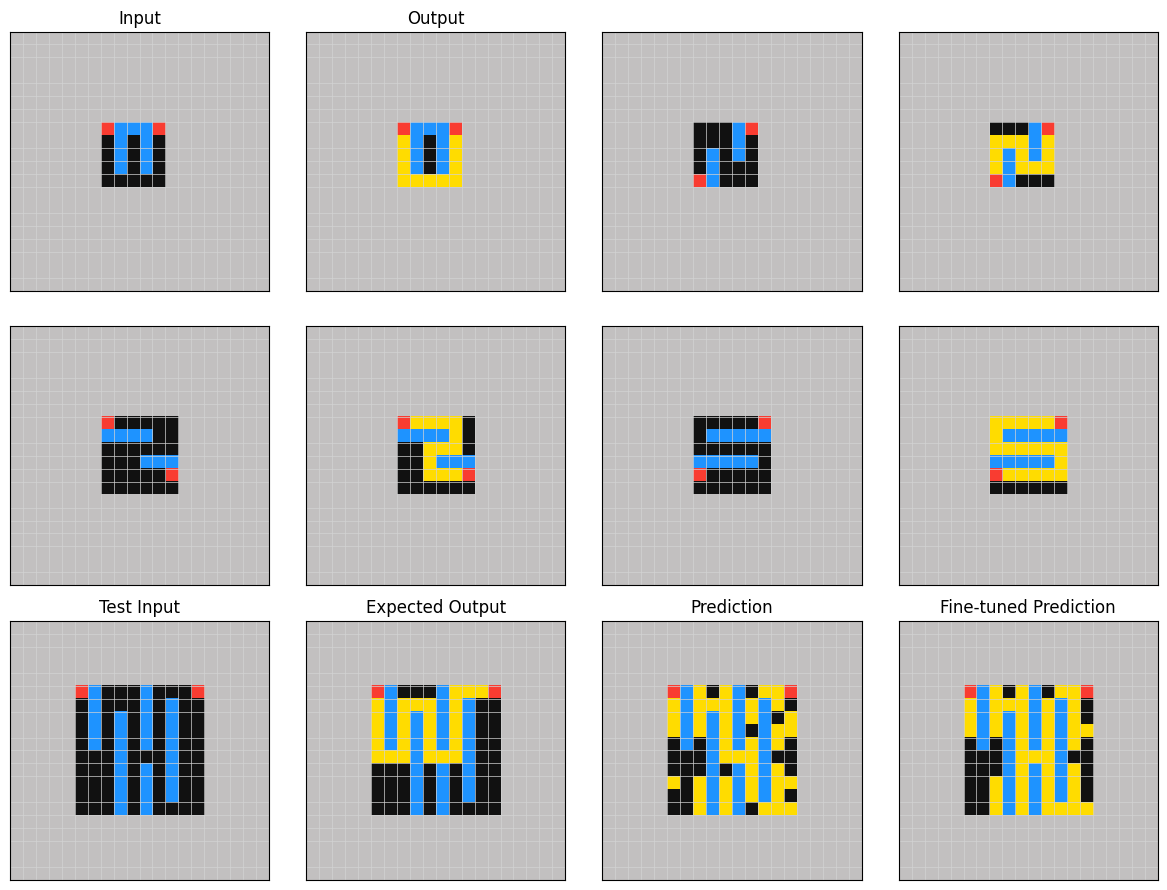

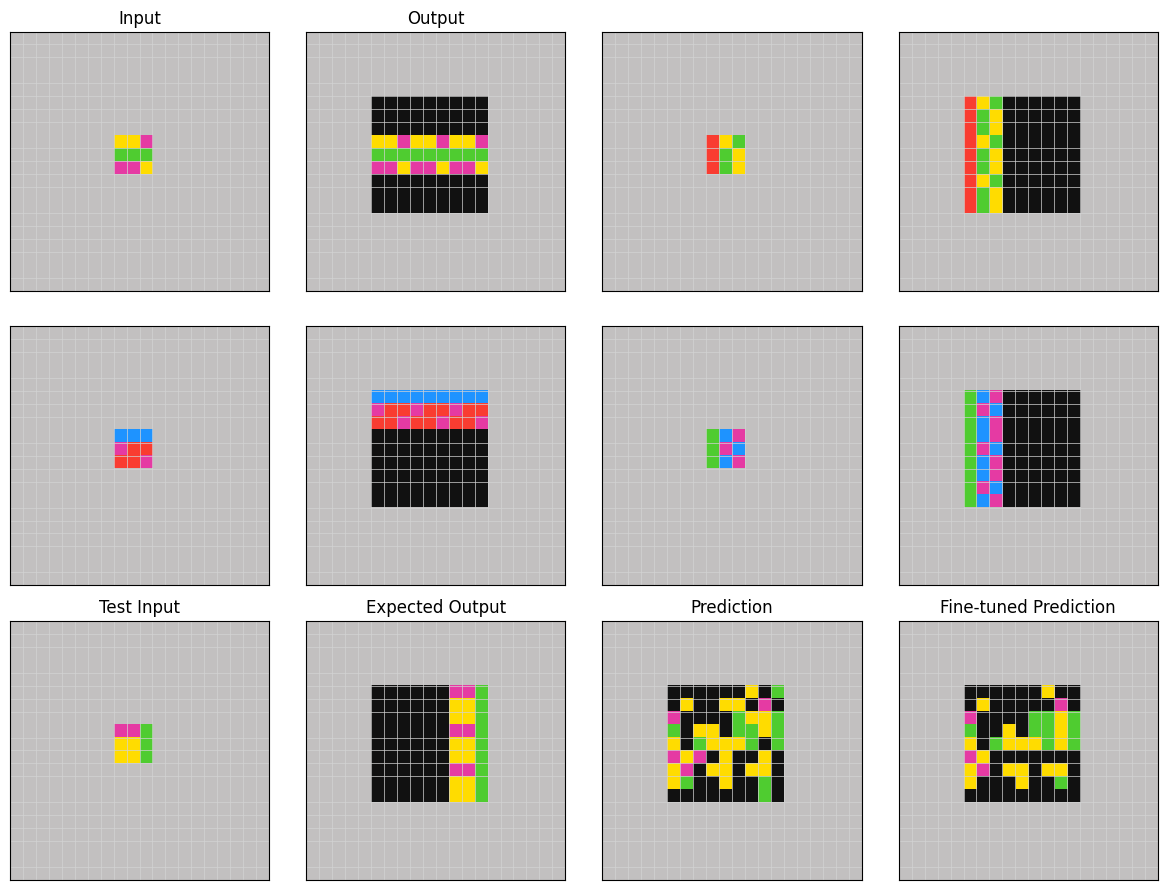

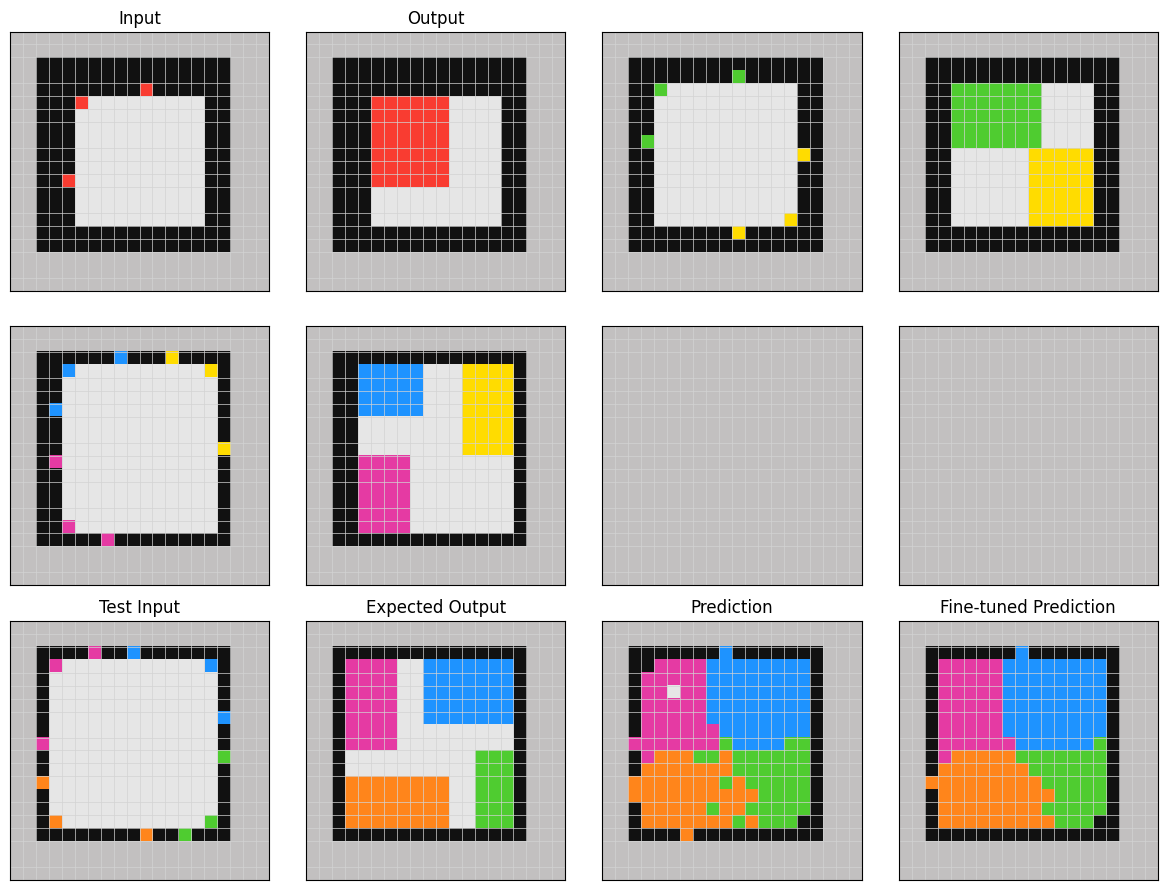

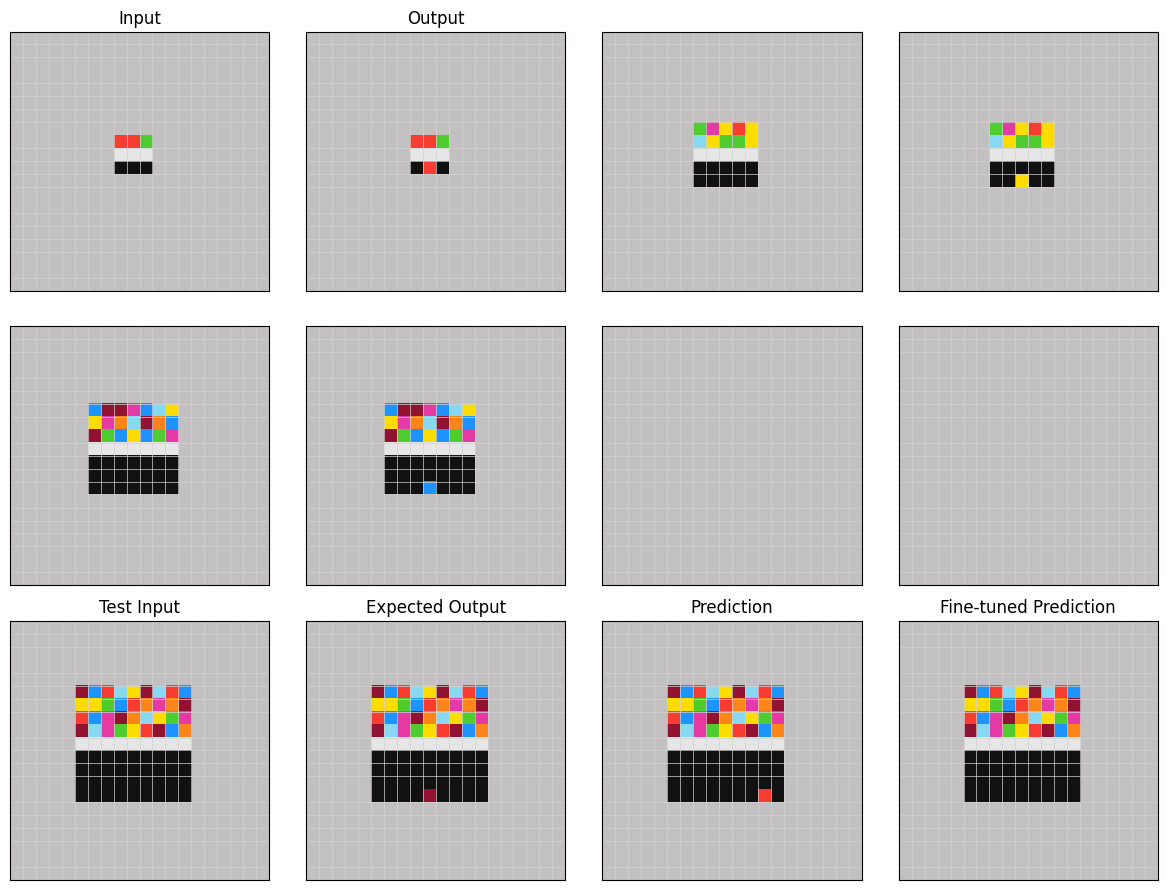

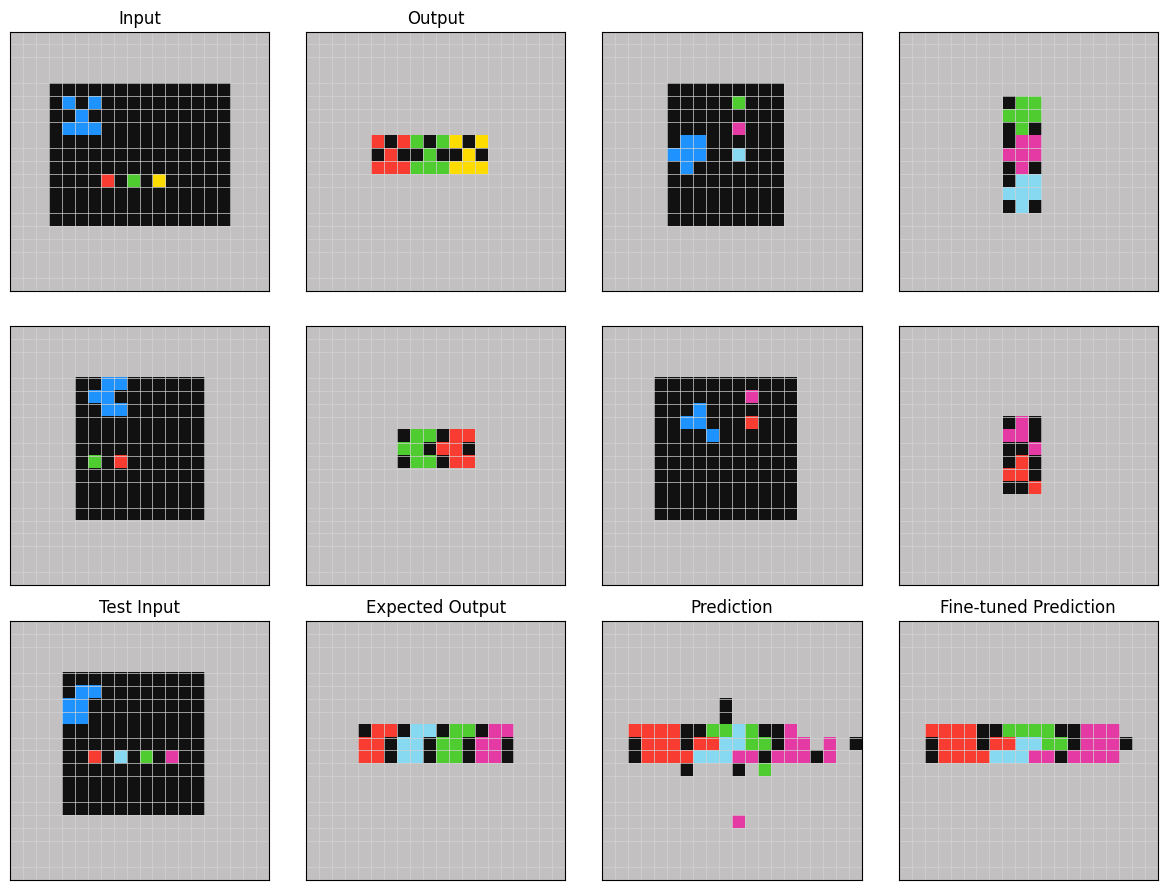

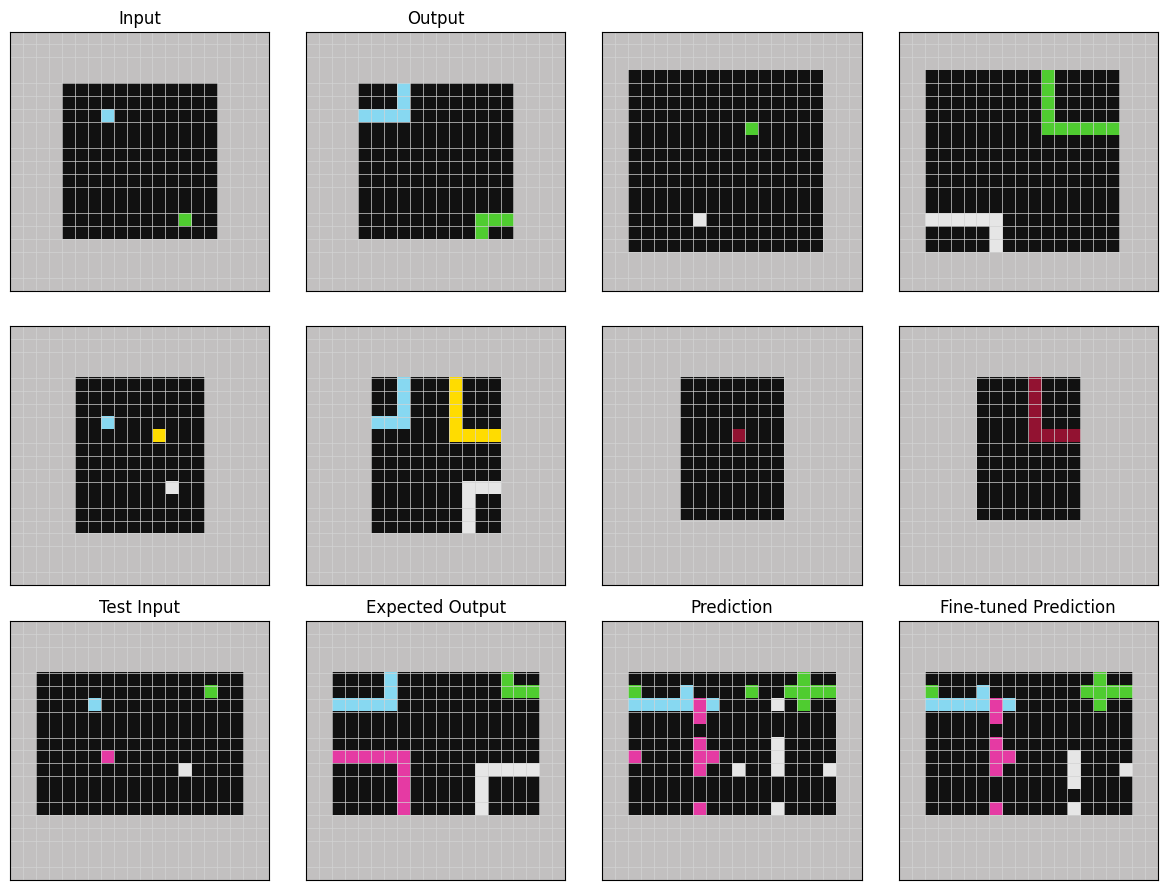

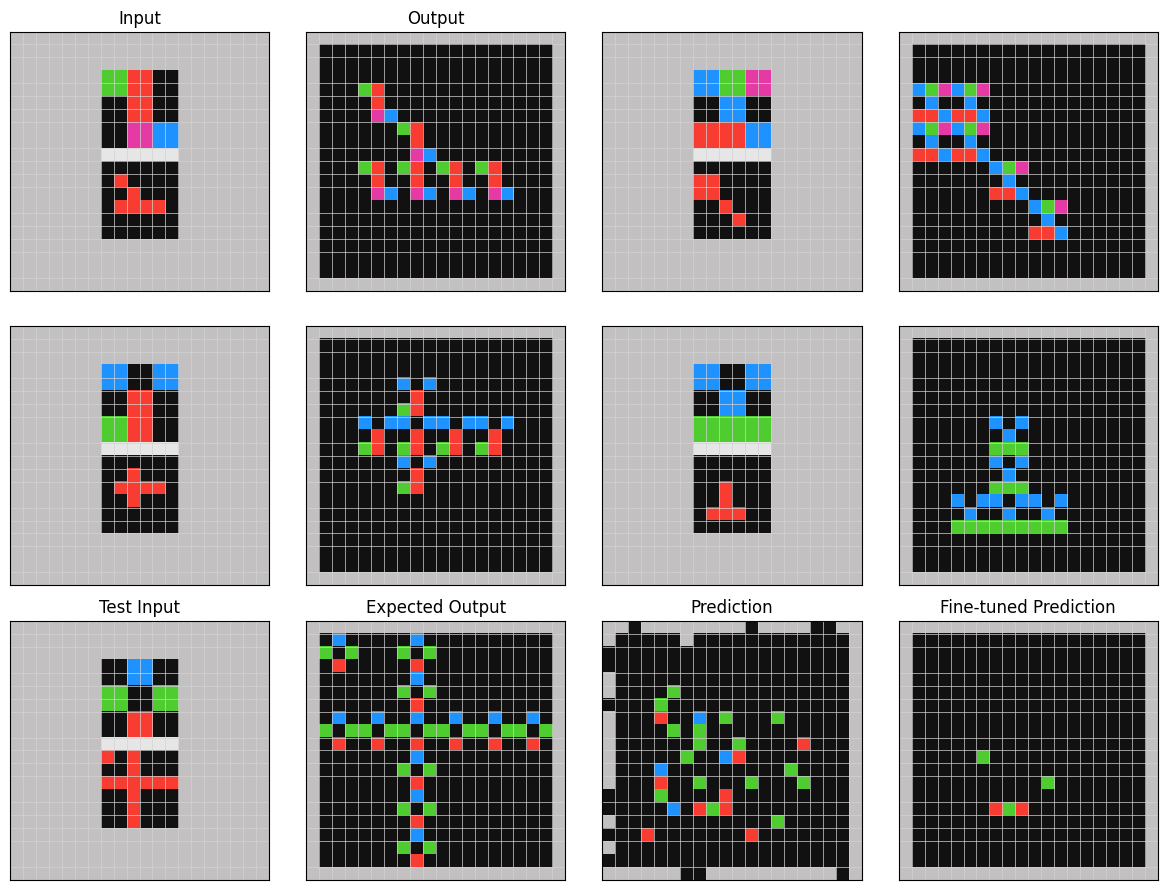

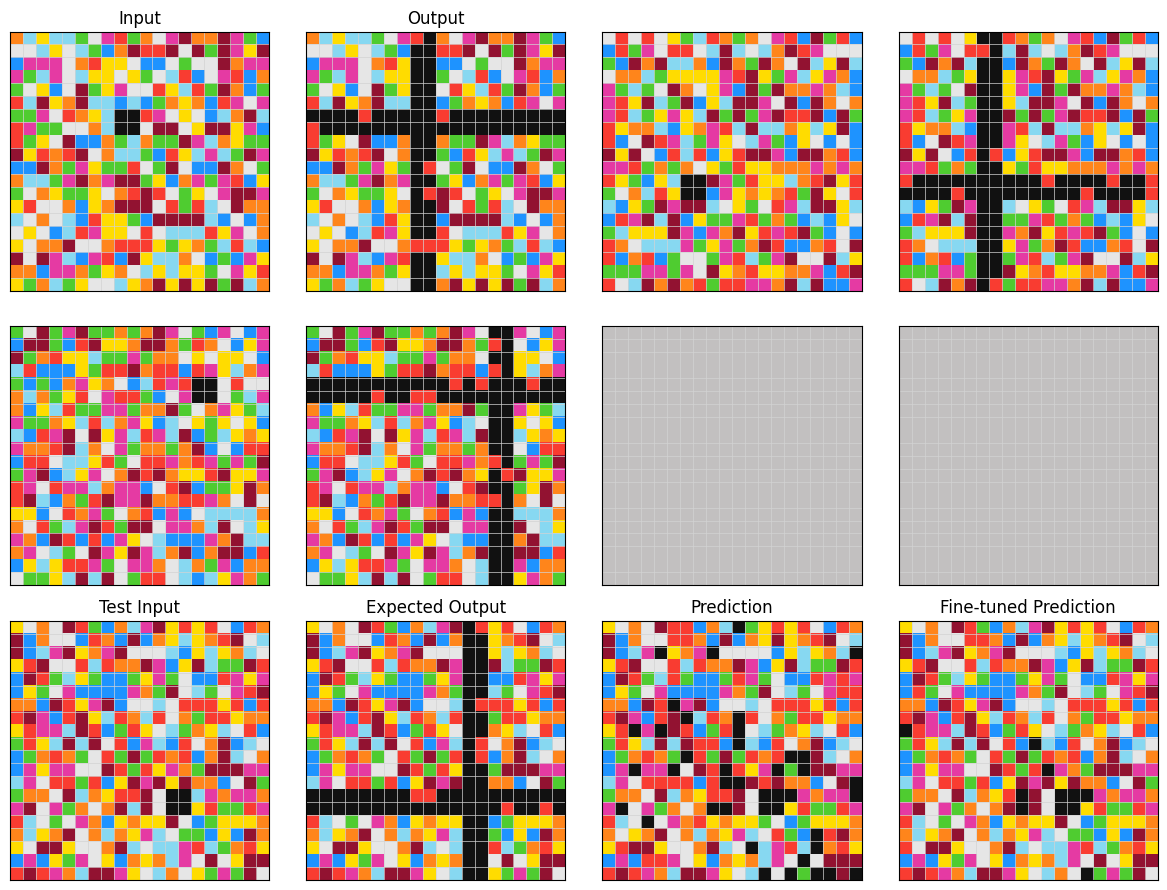

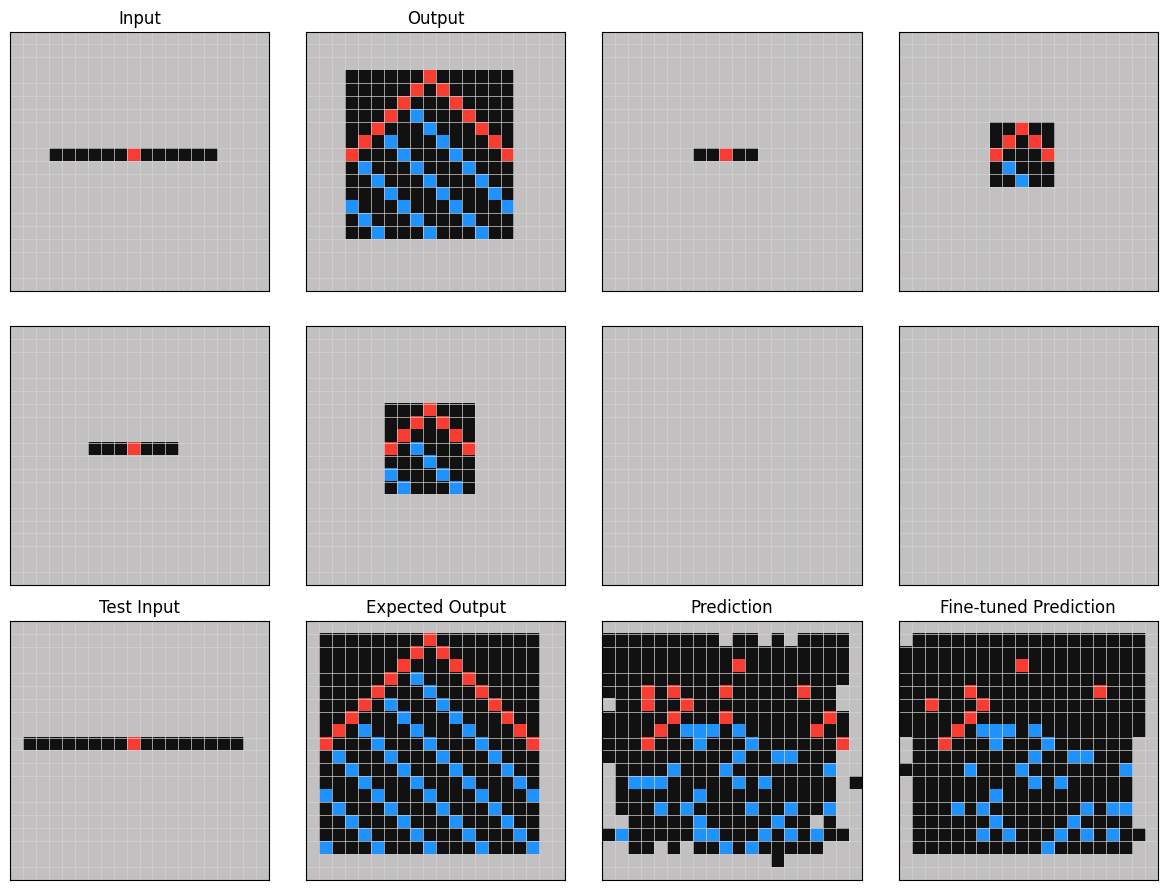

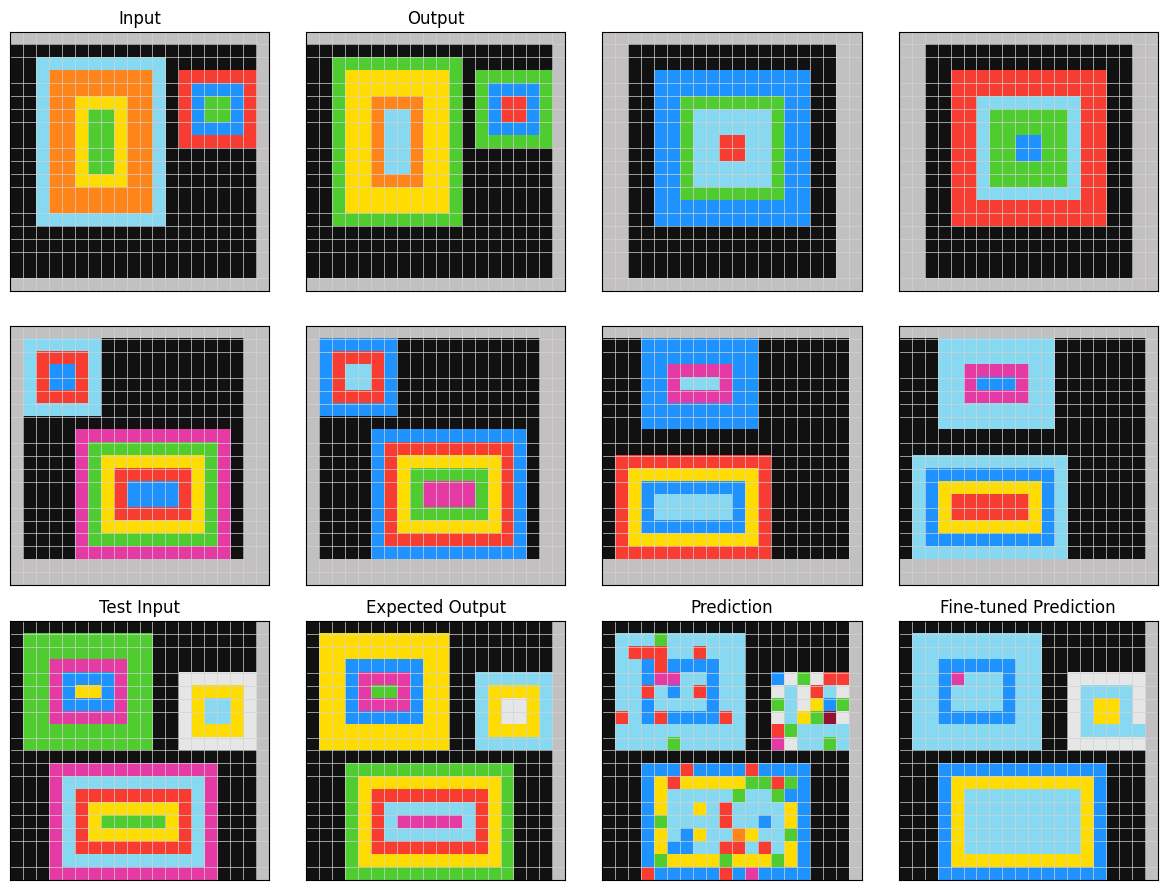

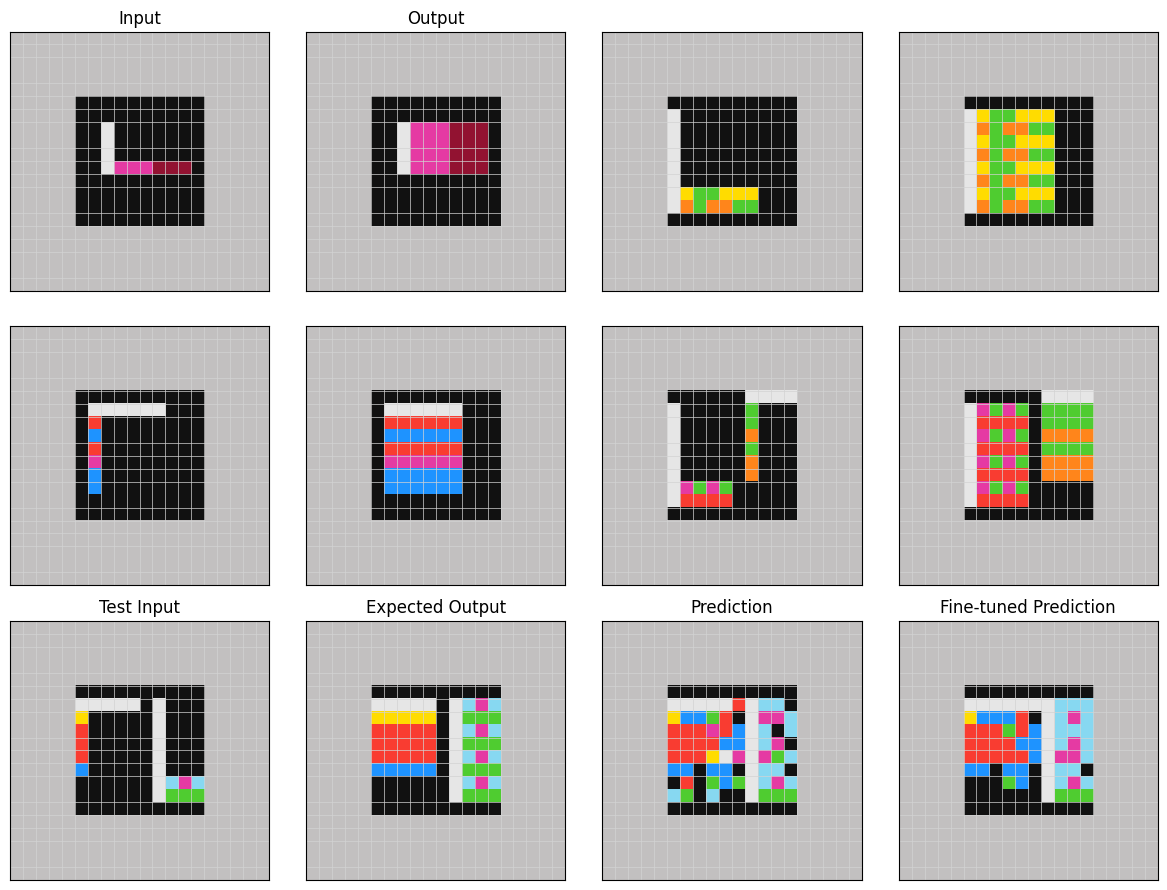

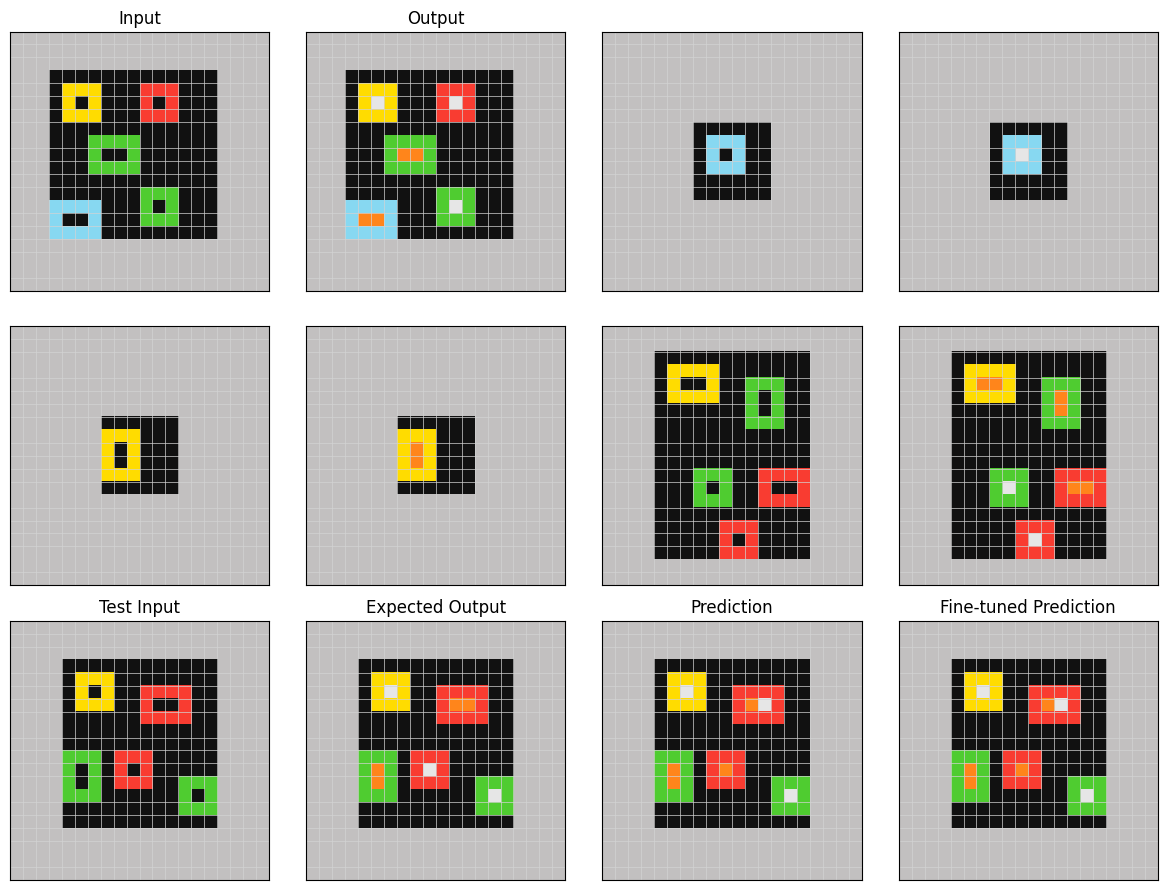

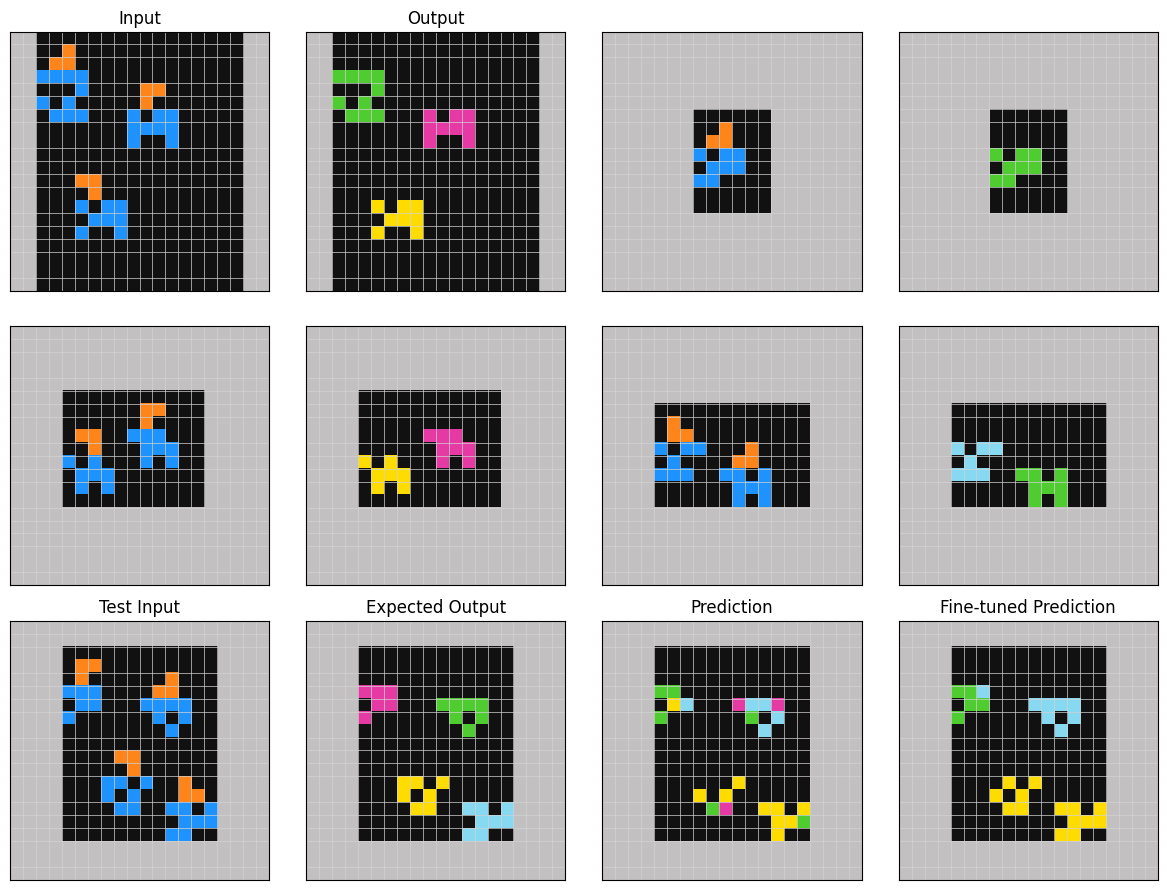

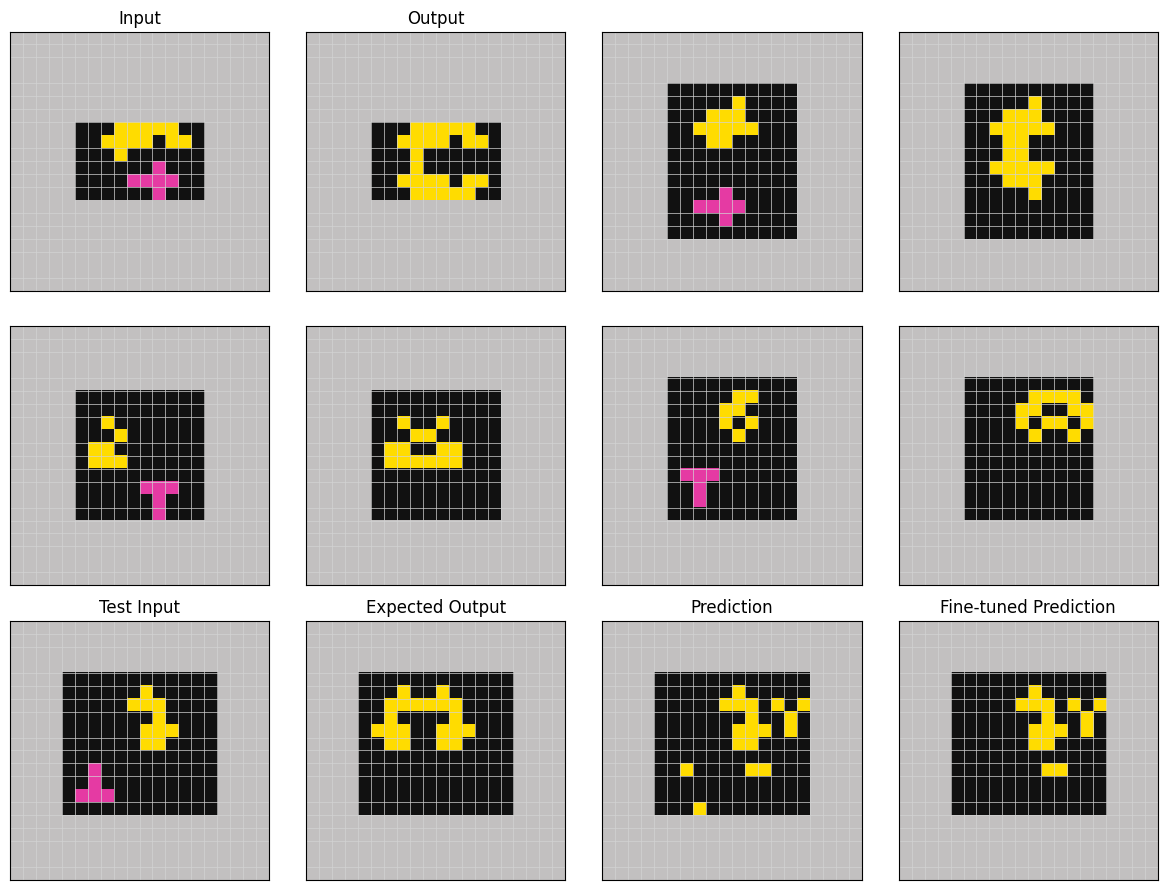

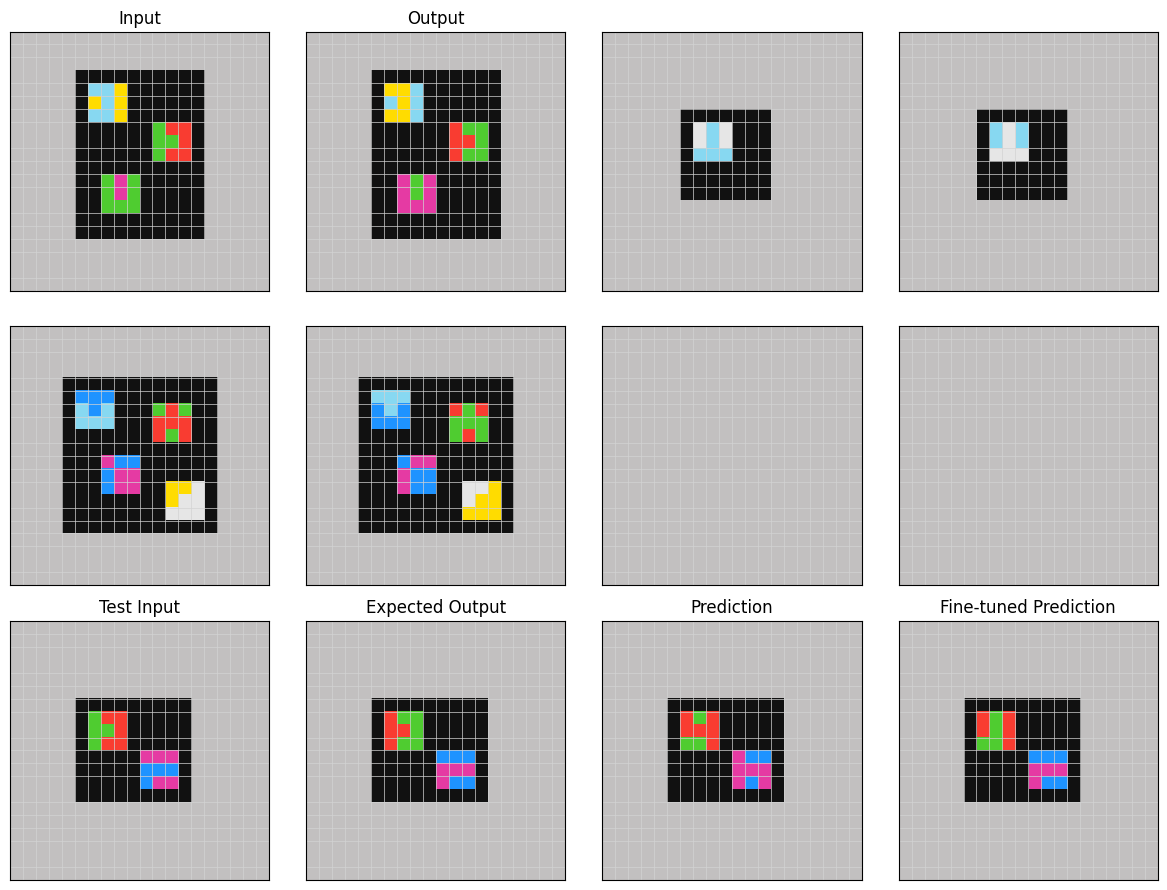

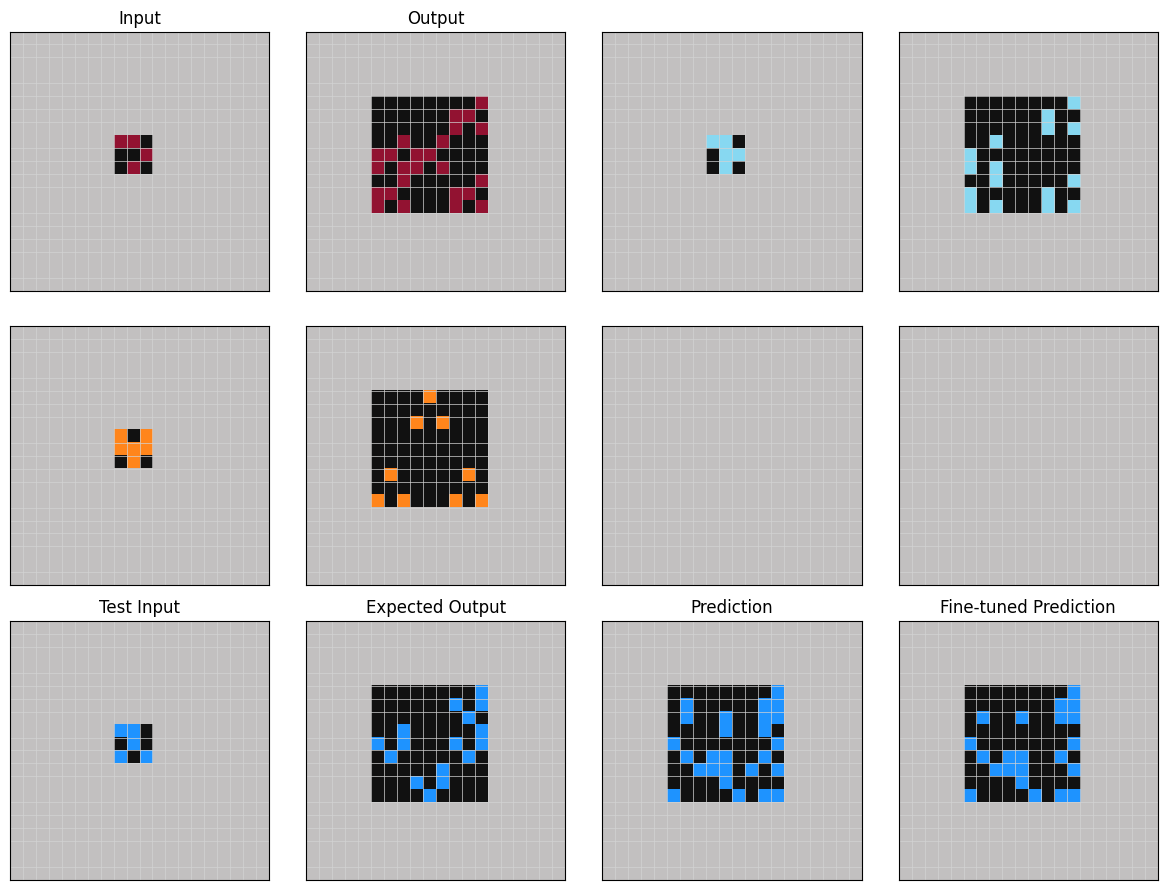

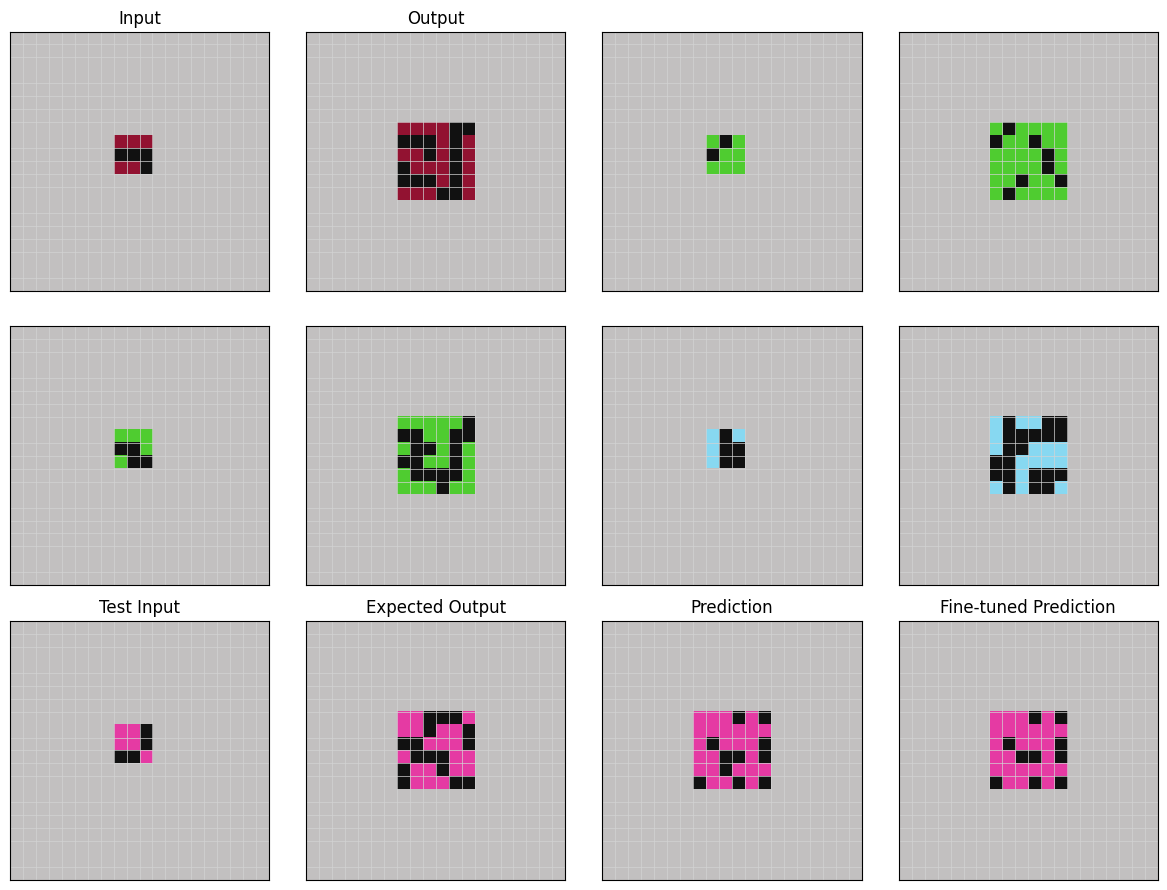

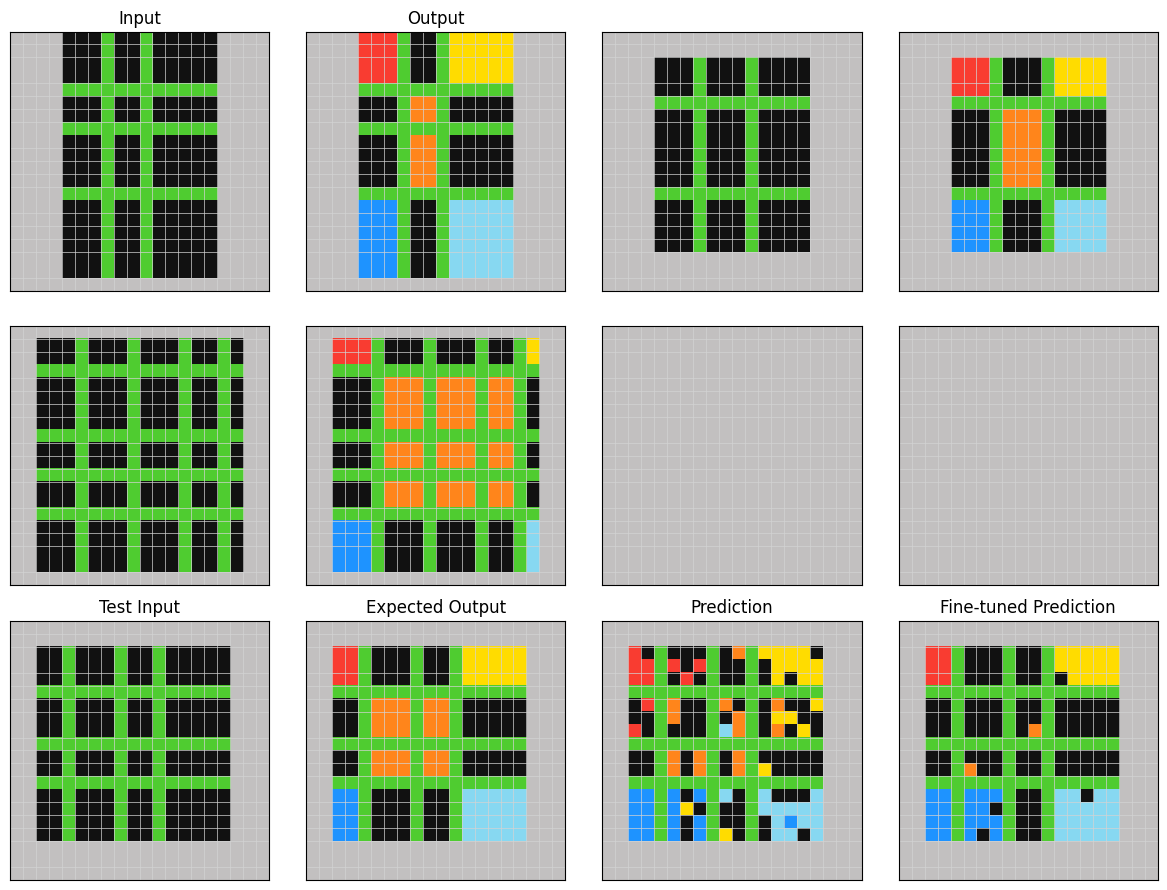

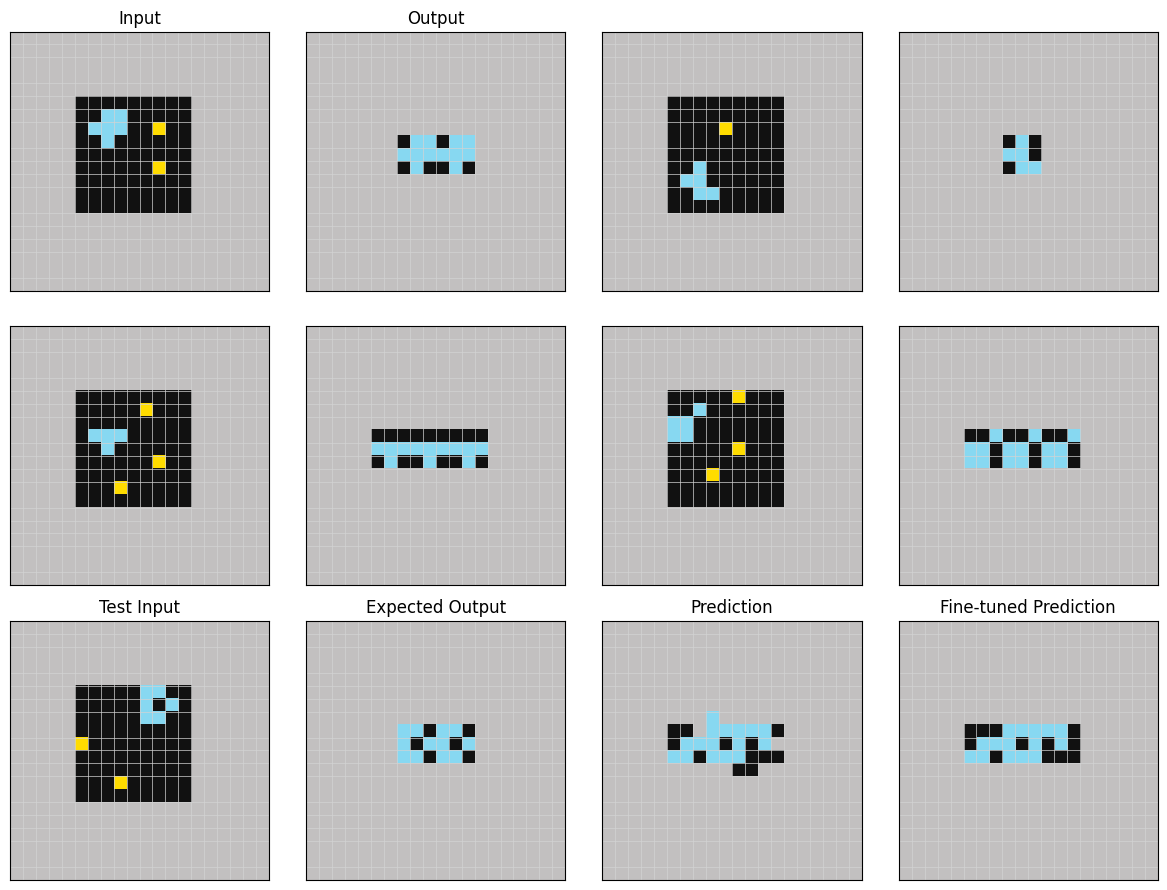

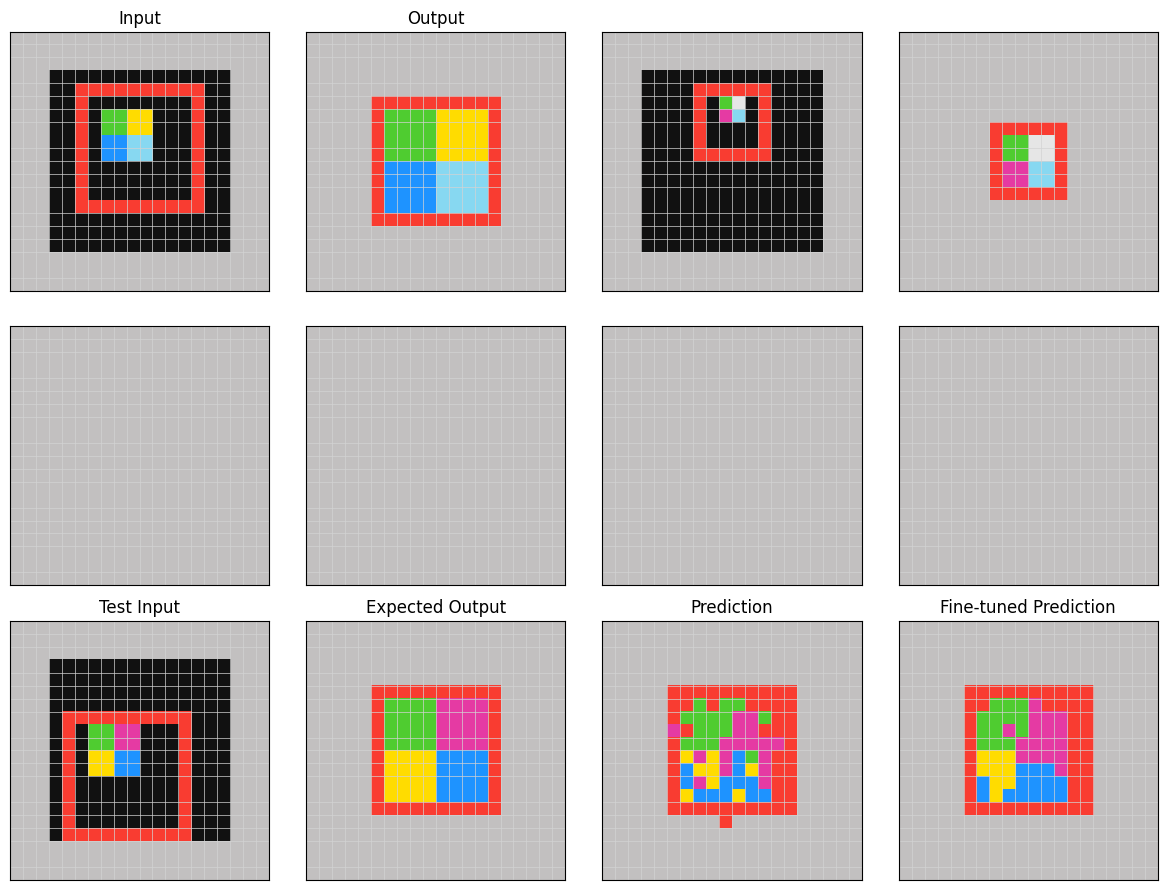

In [51]:
import torch
import matplotlib.pyplot as plt
from arc_prize.vis import visualize_tensors, visualize_all_heads
from arc_prize.vis import visualize_mean_mha_attention


def visualize_mean_attention(attention_weights: torch.Tensor, num_grids: int, grid_size: int):
    # Reshape the attention weights
    # From [4, 100, 900] to [4, 100, 9, 10, 10]
    num_heads = attention_weights.shape[0]
    reshaped_attention = attention_weights.view(
        num_heads, num_grids, grid_size, grid_size
    )

    # Calculate mean attention across the target sequence (dim=1)
    # mean_attention = reshaped_attention.mean(dim=1)  # Shape: [4, 9, 10, 10]
    mean_attention = reshaped_attention

    # Create a figure with subplots for each head
    fig, axes = plt.subplots(num_heads, num_grids, figsize=(20, 10))

    for head in range(num_heads):
        # Create a 3x3 grid of heatmaps
        for i in range(num_grids):
            grid_attention = mean_attention[head, i]

            # Add subplot within the head's subplot
            # sub_ax = ax.inset_axes([1/9])
            ax = axes[head, i]
            im = ax.imshow(grid_attention, cmap="viridis", interpolation="nearest")
            # ax.axis("off")

            if i == 0:
                ax.set_ylabel(f"Head {head + 1}", rotation=0, ha="right", va="center")

            # Add colorbar for each grid
            # plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

        # Remove ticks from the main subplot
        ax.set_xticks([])
        ax.set_yticks([])

    
    plt.tight_layout()
    plt.show()

for item in output:
#   if np.array_equal(item["output_grid"], item["predictions"]) is True:
    visualize_tensors(torch.Tensor(item["grids"]).squeeze(0), torch.Tensor(item["output_grid"]).squeeze(0), torch.Tensor(item["predictions"]).squeeze(0).squeeze(0), torch.Tensor(item["refined_predictions"]).squeeze(0).squeeze(0))
# print(torch.Tensor(item["decoder_sa_attn_weights"]).shape)
  # for i, layer in enumerate(torch.Tensor(item["decoder_mha_attn_weights"]).squeeze(0)):
  #   print(layer.shape)
  #   visualize_mean_attention(layer, 9, 30)
    

  # visualize_all_heads(layer, title=f"Layer {i}")
# for i, layer in enumerate(torch.Tensor(item["decoder_sa_attn_weights"]).squeeze(0)):
#     visualize_mean_sa_attention(layer)
    
